# Kwanza Tukule Assessment

## Task: Derive actionable insights and recommendations

### Section 1: Data Cleaning and Preparation

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import openpyxl
from scipy.stats import mode
from sklearn.cluster import KMeans
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import plotly.express as px


In [2]:
pd.read_excel("Case Study Data - Read Only.xlsx")

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0
...,...,...,...,...,...,...,...
333400,2024-01-09 20:49:00,Category-119,Product-e98d,Business-f9ff,Location-1979,1,1770.0
333401,2024-08-20 20:24:00,Category-106,Product-21f4,Business-72bc,Location-689f,1,850.0
333402,2024-08-20 20:24:00,Category-76,Product-6e9c,Business-72bc,Location-689f,1,2575.0
333403,2024-10-10 18:19:00,Category-91,Product-523e,Business-2693,Location-b27b,1,1520.0


In [3]:
sales_df = pd.read_excel("Case Study Data - Read Only.xlsx")

In [4]:
# View first 5 records
sales_df.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0


In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333405 entries, 0 to 333404
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE                 333405 non-null  datetime64[ns]
 1   ANONYMIZED CATEGORY  333405 non-null  object        
 2   ANONYMIZED PRODUCT   333405 non-null  object        
 3   ANONYMIZED BUSINESS  333405 non-null  object        
 4   ANONYMIZED LOCATION  333405 non-null  object        
 5   QUANTITY             333405 non-null  int64         
 6   UNIT PRICE           333397 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 17.8+ MB


In [6]:
sales_df.describe()

,DATE,QUANTITY,UNIT PRICE
count,333405,333405.000000,333397.000000
mean,2024-07-17 10:21:49.663381760,2.321186,2322.039538
min,2024-01-01 05:54:00,0.000000,0.000000
25%,2024-04-28 20:59:00,1.000000,1420.000000
50%,2024-07-28 17:18:00,1.000000,1840.000000
75%,2024-10-14 14:50:00,2.000000,2755.000000
max,2024-12-31 18:24:00,359.000000,16136.000000
std,NaN,3.790614,1585.256624


In [7]:
sales_df.nunique()

DATE                   96703
ANONYMIZED CATEGORY       46
ANONYMIZED PRODUCT       820
ANONYMIZED BUSINESS     4800
ANONYMIZED LOCATION       53
QUANTITY                  79
UNIT PRICE              1050
dtype: int64

In [8]:
# Identify count of null entries per column
sales_df.isnull().sum()

DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             8
dtype: int64

In [10]:
# Display entries with null values in dataframe
sales_df[sales_df.isnull().any(axis=1)]

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
108112,2024-07-03 17:53:00,Category-94,Product-3d7f,Business-4fce,Location-f37d,2,NaN
150961,2024-12-16 18:33:00,Category-79,Product-dfc8,Business-8bbf,Location-3fc0,1,NaN
151142,2024-12-22 14:42:00,Category-122,Product-15e0,Business-c575,Location-1979,3,NaN
272379,2024-06-27 12:15:00,Category-92,Product-ccbc,Business-14b6,Location-1979,1,NaN
278284,2024-08-14 21:09:00,Category-101,Product-84a5,Business-4be1,Location-bb69,21,NaN
278384,2024-12-30 14:17:00,Category-95,Product-15f3,Business-1a74,Location-f37d,1,NaN
310385,2024-03-31 14:03:00,Category-114,Product-9204,Business-c9dc,Location-689f,1,NaN
327152,2024-08-13 16:20:00,Category-107,Product-7eed,Business-0d61,Location-1ba8,1,NaN


In [11]:
null_entries = sales_df[sales_df.isnull().any(axis=1)]

# Get unique products with missing values
affected_products = null_entries["ANONYMIZED PRODUCT"].unique()


In [12]:
# Find entries with matching product values to. those of null values
matching_entries = sales_df[
    (sales_df["ANONYMIZED PRODUCT"].isin(affected_products))
]

# Display the matching rows
matching_entries


,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
87,2024-11-24 16:19:00,Category-107,Product-7eed,Business-06ed,Location-3e32,1,1570.0
196,2024-09-25 13:05:00,Category-94,Product-3d7f,Business-cdc1,Location-e2f8,1,860.0
287,2024-11-13 19:36:00,Category-94,Product-3d7f,Business-7f77,Location-8959,1,860.0
319,2024-11-01 16:54:00,Category-94,Product-3d7f,Business-2b91,Location-3fc0,1,860.0
372,2024-07-11 11:20:00,Category-94,Product-3d7f,Business-2b24,Location-66f4,5,875.0
...,...,...,...,...,...,...,...
332771,2024-10-15 20:01:00,Category-94,Product-3d7f,Business-0ea3,Location-4ea1,1,860.0
332802,2024-10-21 19:04:00,Category-94,Product-3d7f,Business-5415,Location-128a,1,860.0
332842,2024-09-20 13:43:00,Category-94,Product-3d7f,Business-5760,Location-689f,1,860.0
333002,2024-10-08 17:15:00,Category-94,Product-3d7f,Business-8603,Location-b27b,1,860.0


- The orders that have null values involve products where some have varying prices. 

In [13]:
# Group by Product and aggregate unique Quantity-Unit Price pairs
grouped_data = (
    matching_entries.groupby("ANONYMIZED PRODUCT")[["QUANTITY", "UNIT PRICE"]]
    .apply(lambda x: x.drop_duplicates().sort_values(["QUANTITY", "UNIT PRICE"]))
)

# Reset index for a cleaner view
grouped_data = grouped_data.reset_index()
grouped_data


,ANONYMIZED PRODUCT,level_1,QUANTITY,UNIT PRICE
0,Product-15e0,199322,1,2480.0
1,Product-15e0,105503,2,2480.0
2,Product-15e0,187599,3,2480.0
3,Product-15e0,151142,3,NaN
4,Product-15e0,203067,5,2480.0
...,...,...,...,...
95,Product-9204,310385,1,NaN
96,Product-ccbc,18013,1,1550.0
97,Product-ccbc,272379,1,NaN
98,Product-ccbc,36516,2,1550.0


In [14]:
# Display a wider range of results
grouped_data.head(40)

,ANONYMIZED PRODUCT,level_1,QUANTITY,UNIT PRICE
0,Product-15e0,199322,1,2480.0
1,Product-15e0,105503,2,2480.0
2,Product-15e0,187599,3,2480.0
3,Product-15e0,151142,3,NaN
4,Product-15e0,203067,5,2480.0
5,Product-15e0,309055,7,2480.0
6,Product-15e0,11995,50,2480.0
7,Product-15f3,278384,1,NaN
8,Product-3d7f,196,1,860.0
9,Product-3d7f,15167,1,870.0


In [15]:
grouped_data.tail(40)

,ANONYMIZED PRODUCT,level_1,QUANTITY,UNIT PRICE
60,Product-7eed,50572,6,1585.0
61,Product-84a5,18066,1,1730.0
62,Product-84a5,30070,1,1805.0
63,Product-84a5,107864,1,1820.0
64,Product-84a5,14487,1,1830.0
65,Product-84a5,107020,1,2450.0
66,Product-84a5,19763,2,1730.0
67,Product-84a5,47467,2,1805.0
68,Product-84a5,8761,2,1820.0
69,Product-84a5,18942,2,1830.0


In [16]:
grouped_data.iloc[8:49]

,ANONYMIZED PRODUCT,level_1,QUANTITY,UNIT PRICE
8,Product-3d7f,196,1,860.0
9,Product-3d7f,15167,1,870.0
10,Product-3d7f,2478,1,875.0
11,Product-3d7f,447,1,885.0
12,Product-3d7f,565,2,860.0
13,Product-3d7f,1468,2,870.0
14,Product-3d7f,661,2,875.0
15,Product-3d7f,5002,2,885.0
16,Product-3d7f,108112,2,NaN
17,Product-3d7f,1388,3,860.0


In [17]:
grouped_data.iloc[49:61]

,ANONYMIZED PRODUCT,level_1,QUANTITY,UNIT PRICE
49,Product-7eed,87,1,1570.0
50,Product-7eed,7786,1,1575.0
51,Product-7eed,1430,1,1585.0
52,Product-7eed,327152,1,NaN
53,Product-7eed,2805,2,1570.0
54,Product-7eed,140345,2,1575.0
55,Product-7eed,14418,2,1585.0
56,Product-7eed,488,3,1570.0
57,Product-7eed,82520,3,1575.0
58,Product-7eed,118090,3,1585.0


For the products with missing values, they fall into 3 criterias:

1.) Product_id 15e0 and ccbc have consistent pricing throughout regardless of their quantities

2.) Product_id 15f3,9204 and dfe8 only have one entry. each, that is, the entries with null unit prices

3.) Product_id 7eed, 3d7f and 84a5 have varying prices even for items of similar quantity. 



#### Criteria 1: Use the consistent prices on the products that have null unit price.

In [18]:
consistent_products = ["Product-15e0", "Product-ccbc"]
for product in consistent_products:
    price = grouped_data.loc[grouped_data["ANONYMIZED PRODUCT"] == product, "UNIT PRICE"].dropna().unique()[0]
    grouped_data.loc[(grouped_data["ANONYMIZED PRODUCT"] == product) & (grouped_data["UNIT PRICE"].isna()), "UNIT PRICE"] = price


In [19]:
grouped_data

,ANONYMIZED PRODUCT,level_1,QUANTITY,UNIT PRICE
0,Product-15e0,199322,1,2480.0
1,Product-15e0,105503,2,2480.0
2,Product-15e0,187599,3,2480.0
3,Product-15e0,151142,3,2480.0
4,Product-15e0,203067,5,2480.0
...,...,...,...,...
95,Product-9204,310385,1,NaN
96,Product-ccbc,18013,1,1550.0
97,Product-ccbc,272379,1,1550.0
98,Product-ccbc,36516,2,1550.0


In [41]:
# Do this on the main df
consistent_products = ["Product-15e0", "Product-ccbc"]
for product in consistent_products:
    price = sales_df.loc[sales_df["ANONYMIZED PRODUCT"] == product, "UNIT PRICE"].dropna().unique()[0]
    sales_df.loc[(sales_df["ANONYMIZED PRODUCT"] == product) & (sales_df["UNIT PRICE"].isna()), "UNIT PRICE"] = price


In [42]:
sorted(sales_df.loc[sales_df["ANONYMIZED PRODUCT"] == "Product-15e0", "UNIT PRICE"].dropna().unique())


[np.float64(2480.0)]

In [43]:
sorted(sales_df.loc[sales_df["ANONYMIZED PRODUCT"] == "Product-ccbc", "UNIT PRICE"].dropna().unique())


[np.float64(1550.0)]

#### Criteria 2: For the products that only exist with null unit price, we will drop them
- This is because there is no price to compare or reference them to.

In [20]:
# Define the products with only one entry
single_entry_products = ["Product-15f3", "Product-9204", "Product-dfc8"]


In [23]:
# Extract their details for review
single_entry_details = grouped_data[grouped_data["ANONYMIZED PRODUCT"].isin(single_entry_products)]

# Save for review
single_entry_list = single_entry_details.to_dict(orient="records")

# Display extracted entries
single_entry_details

,ANONYMIZED PRODUCT,level_1,QUANTITY,UNIT PRICE
7,Product-15f3,278384,1,NaN
95,Product-9204,310385,1,NaN
99,Product-dfc8,150961,1,NaN


In [24]:
# Drop these from the DataFrame
grouped_data = grouped_data[~grouped_data["ANONYMIZED PRODUCT"].isin(single_entry_products)]


In [25]:
# Doinng the same on the main df
# Extract their details for review
sales_df_single_entry_details = sales_df[sales_df["ANONYMIZED PRODUCT"].isin(single_entry_products)]

# Save for review
sales_df_single_entry_list = sales_df_single_entry_details.to_dict(orient="records")

# Drop these from the main DataFrame
sales_df = sales_df[~sales_df["ANONYMIZED PRODUCT"].isin(single_entry_products)]

# Display extracted entries
sales_df_single_entry_details


,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
150961,2024-12-16 18:33:00,Category-79,Product-dfc8,Business-8bbf,Location-3fc0,1,NaN
278384,2024-12-30 14:17:00,Category-95,Product-15f3,Business-1a74,Location-f37d,1,NaN
310385,2024-03-31 14:03:00,Category-114,Product-9204,Business-c9dc,Location-689f,1,NaN


In [26]:
grouped_data.isnull().sum()

ANONYMIZED PRODUCT    0
level_1               0
QUANTITY              0
UNIT PRICE            3
dtype: int64

#### Criteria 3: For the products with varyinng prices.

In [27]:
# Define the products with varying prices
variable_price_products = ["Product-7eed", "Product-3d7f", "Product-84a5"]

# Filter data for these products and include location in analysis
location_price_analysis = (
    sales_df[sales_df["ANONYMIZED PRODUCT"].isin(variable_price_products)]
    .groupby(["ANONYMIZED PRODUCT", "ANONYMIZED BUSINESS", "ANONYMIZED LOCATION","QUANTITY"])["UNIT PRICE"]
    .agg(["count", "nunique", "min", "max", "median"])
    .reset_index()
)

# Display analysis results
location_price_analysis


,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,count,nunique,min,max,median
0,Product-3d7f,Business-0109,Location-b125,1,13,1,860.0,860.0,860.0
1,Product-3d7f,Business-016c,Location-47dc,1,1,1,870.0,870.0,870.0
2,Product-3d7f,Business-01e4,Location-3e32,3,1,1,860.0,860.0,860.0
3,Product-3d7f,Business-02c1,Location-c2f2,1,1,1,860.0,860.0,860.0
4,Product-3d7f,Business-0305,Location-c2f2,2,1,1,860.0,860.0,860.0
...,...,...,...,...,...,...,...,...,...
1553,Product-84a5,Business-e132,Location-9149,1,1,1,1805.0,1805.0,1805.0
1554,Product-84a5,Business-e132,Location-9149,2,1,1,1805.0,1805.0,1805.0
1555,Product-84a5,Business-eb14,Location-d1a8,1,1,1,1805.0,1805.0,1805.0
1556,Product-84a5,Business-f13b,Location-bb69,10,1,1,1730.0,1730.0,1730.0


In [28]:
location_price_analysis.iloc[1497:1557]


,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,count,nunique,min,max,median
1497,Product-84a5,Business-102d,Location-f21b,2,1,1,2450.0,2450.0,2450.0
1498,Product-84a5,Business-1626,Location-8099,5,1,1,1730.0,1730.0,1730.0
1499,Product-84a5,Business-195b,Location-c86b,1,2,2,1730.0,1805.0,1767.5
1500,Product-84a5,Business-1f3e,Location-78ce,1,1,1,1820.0,1820.0,1820.0
1501,Product-84a5,Business-2465,Location-8099,6,2,1,1730.0,1730.0,1730.0
1502,Product-84a5,Business-2ba7,Location-9149,2,3,1,1830.0,1830.0,1830.0
1503,Product-84a5,Business-2ba7,Location-9149,4,3,2,1805.0,1830.0,1805.0
1504,Product-84a5,Business-2ba7,Location-9149,5,5,2,1730.0,1830.0,1730.0
1505,Product-84a5,Business-2e05,Location-f7fa,5,1,1,1820.0,1820.0,1820.0
1506,Product-84a5,Business-2e4a,Location-9149,1,1,1,1805.0,1805.0,1805.0


- We tried looking at whether location would influence the varying prices but products delivered to the same location and others even the same businness had significantly different prices

In [29]:
# List of products with missing unit prices from Criteria 2
products_with_null_prices = ["Product-3d7f", "Product-84a5", "Product-7eed"]

# Filter out rows where UNIT PRICE is null and get the corresponding businesses
businesses_with_null_prices = sales_df[sales_df["ANONYMIZED PRODUCT"].isin(products_with_null_prices) & sales_df["UNIT PRICE"].isna()]["ANONYMIZED BUSINESS"].unique()

# Now, find all the other products sent to these businesses (excluding the ones with null prices)
other_products_sent_to_same_businesses = sales_df[
    (sales_df["ANONYMIZED BUSINESS"].isin(businesses_with_null_prices)) &
    # (sales_df["ANONYMIZED BUSINESS"].isin(businesses_with_null_prices))
    (sales_df["ANONYMIZED PRODUCT"].isin(products_with_null_prices))
]

# Display the matching rows
other_products_sent_to_same_businesses


,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
15991,2024-09-19 20:16:00,Category-107,Product-7eed,Business-0d61,Location-1ba8,1,1585.0
53926,2024-07-21 16:29:00,Category-94,Product-3d7f,Business-0d61,Location-1ba8,3,875.0
70566,2024-08-15 17:56:00,Category-107,Product-7eed,Business-0d61,Location-1ba8,1,1575.0
80028,2024-07-14 14:35:00,Category-94,Product-3d7f,Business-0d61,Location-1ba8,4,875.0
108112,2024-07-03 17:53:00,Category-94,Product-3d7f,Business-4fce,Location-f37d,2,NaN
136504,2024-07-03 18:05:00,Category-94,Product-3d7f,Business-4fce,Location-f37d,2,875.0
150318,2024-07-04 17:07:00,Category-94,Product-3d7f,Business-0d61,Location-1ba8,3,875.0
197478,2024-08-19 22:08:00,Category-101,Product-84a5,Business-4be1,Location-bb69,3,1730.0
234602,2024-10-22 20:13:00,Category-107,Product-7eed,Business-0d61,Location-1ba8,1,1570.0
271519,2024-10-08 14:02:00,Category-107,Product-7eed,Business-0d61,Location-1ba8,1,1570.0


In [30]:
# Sort the data by 'ANONYMIZED PRODUCT' (product name) before performing the groupby
ordered_data = other_products_sent_to_same_businesses.sort_values("ANONYMIZED PRODUCT")

# Display the ordered rows
ordered_data


,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
53926,2024-07-21 16:29:00,Category-94,Product-3d7f,Business-0d61,Location-1ba8,3,875.0
80028,2024-07-14 14:35:00,Category-94,Product-3d7f,Business-0d61,Location-1ba8,4,875.0
108112,2024-07-03 17:53:00,Category-94,Product-3d7f,Business-4fce,Location-f37d,2,NaN
136504,2024-07-03 18:05:00,Category-94,Product-3d7f,Business-4fce,Location-f37d,2,875.0
150318,2024-07-04 17:07:00,Category-94,Product-3d7f,Business-0d61,Location-1ba8,3,875.0
15991,2024-09-19 20:16:00,Category-107,Product-7eed,Business-0d61,Location-1ba8,1,1585.0
70566,2024-08-15 17:56:00,Category-107,Product-7eed,Business-0d61,Location-1ba8,1,1575.0
234602,2024-10-22 20:13:00,Category-107,Product-7eed,Business-0d61,Location-1ba8,1,1570.0
271519,2024-10-08 14:02:00,Category-107,Product-7eed,Business-0d61,Location-1ba8,1,1570.0
327152,2024-08-13 16:20:00,Category-107,Product-7eed,Business-0d61,Location-1ba8,1,NaN


- For product 3d7f, when the product is delivered to businesses that had null prices, the price of products was consistent. Because of this, we shall set the price of the null 3d7f to 875.
- For product 84a5, we shall use 1730.0 as the unit price for the null entry because the product was previously delivered to the same business at the same price.
- For product 7eed it is opted to use the average of the unit prices of previous deliveries to the same business.

In [32]:
# Define the fixed prices for specific products
fixed_prices = {
    "Product-3d7f": 875.0,
    "Product-84a5": 1730.0
}

# Fill null prices for Product-3d7f and Product-84a5
for product, price in fixed_prices.items():
    sales_df.loc[(sales_df["ANONYMIZED PRODUCT"] == product) & (sales_df["UNIT PRICE"].isna()), "UNIT PRICE"] = price

# For Product-7eed, calculate the average price for the same business
product_7eed_nulls = sales_df[(sales_df["ANONYMIZED PRODUCT"] == "Product-7eed") & (sales_df["UNIT PRICE"].isna())]

for index, row in product_7eed_nulls.iterrows():
    business = row["ANONYMIZED BUSINESS"]
    avg_price = sales_df[(sales_df["ANONYMIZED PRODUCT"] == "Product-7eed") & 
                         (sales_df["ANONYMIZED BUSINESS"] == business) & 
                         (~sales_df["UNIT PRICE"].isna())]["UNIT PRICE"].mean()
    
    # Fill the null value with the calculated average price
    sales_df.at[index, "UNIT PRICE"] = avg_price

# Verify that the missing values have been filled
sales_df[sales_df["ANONYMIZED PRODUCT"].isin(["Product-3d7f", "Product-84a5", "Product-7eed"]) & sales_df["UNIT PRICE"].isna()]


,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE


### Handling duplicates

In [33]:
sales_df.duplicated().sum()

np.int64(3524)

In [34]:
sales_df[sales_df.duplicated(keep=False)]


,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
310,2024-05-17 20:27:00,Category-120,Product-1e80,Business-9909,Location-689f,1,1970.0
311,2024-05-17 20:27:00,Category-75,Product-8f75,Business-9909,Location-689f,1,4020.0
426,2024-01-31 19:34:00,Category-76,Product-e805,Business-bf85,Location-1ba8,5,7018.0
526,2024-02-05 18:24:00,Category-120,Product-29ee,Business-bfcd,Location-3e32,5,2290.0
570,2024-04-19 15:19:00,Category-75,Product-086d,Business-b48e,Location-03fc,3,2090.0
...,...,...,...,...,...,...,...
333133,2024-02-01 09:17:00,Category-111,Product-7fac,Business-4919,Location-3e32,3,814.0
333134,2024-02-01 09:17:00,Category-77,Product-d09c,Business-4919,Location-3e32,1,3200.0
333350,2024-06-10 22:08:00,Category-76,Product-e805,Business-54ad,Location-3e32,5,5965.0
333399,2024-01-09 20:49:00,Category-97,Product-bbdc,Business-f9ff,Location-1979,1,341.0


In [35]:
# Identify duplicated rows (keep=False marks all duplicates)
duplicates = sales_df[sales_df.duplicated(keep=False)]

# Sort duplicates by the columns that define duplication
duplicates = duplicates.sort_values(by=["ANONYMIZED PRODUCT", "ANONYMIZED CATEGORY", "ANONYMIZED BUSINESS", "QUANTITY", "UNIT PRICE"])

# Display duplicates
duplicates

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
1071,2024-12-02 09:38:00,Category-100,Product-031c,Business-3d6e,Location-1c33,1,1820.0
314649,2024-12-02 09:38:00,Category-100,Product-031c,Business-3d6e,Location-1c33,1,1820.0
66030,2024-09-10 08:14:00,Category-100,Product-031c,Business-7cf4,Location-f21b,1,1850.0
220079,2024-09-10 08:14:00,Category-100,Product-031c,Business-7cf4,Location-f21b,1,1850.0
69259,2024-01-22 23:29:00,Category-100,Product-031c,Business-e3c1,Location-d1a8,3,2150.0
...,...,...,...,...,...,...,...
209510,2024-06-09 19:06:00,Category-121,Product-ff95,Business-e997,Location-4ea1,1,1680.0
244202,2024-06-09 19:17:00,Category-121,Product-ff95,Business-e997,Location-4ea1,1,1680.0
270021,2024-06-09 19:17:00,Category-121,Product-ff95,Business-e997,Location-4ea1,1,1680.0
173630,2024-05-06 16:34:00,Category-110,Product-ffb7,Business-4b91,Location-03fc,1,0.0


In [36]:
# Drop the duplicates
sales_df = sales_df.drop_duplicates()

In [40]:
# Identify duplicated rows (keep=False marks all duplicates)
duplicates = sales_df[sales_df.duplicated(keep=False)]

# Sort duplicates by the columns that define duplication
duplicates = duplicates.sort_values(by=["ANONYMIZED PRODUCT", "ANONYMIZED CATEGORY", "ANONYMIZED BUSINESS", "QUANTITY", "UNIT PRICE"])

# Display duplicates
duplicates


,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE


In [38]:
sales_df

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0
...,...,...,...,...,...,...,...
333398,2024-11-13 13:59:00,Category-121,Product-898d,Business-0e99,Location-689f,5,1360.0
333401,2024-08-20 20:24:00,Category-106,Product-21f4,Business-72bc,Location-689f,1,850.0
333402,2024-08-20 20:24:00,Category-76,Product-6e9c,Business-72bc,Location-689f,1,2575.0
333403,2024-10-10 18:19:00,Category-91,Product-523e,Business-2693,Location-b27b,1,1520.0


In [44]:
sales_df.isnull().sum()

DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             0
dtype: int64

In [45]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 329878 entries, 0 to 333404
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE                 329878 non-null  datetime64[ns]
 1   ANONYMIZED CATEGORY  329878 non-null  object        
 2   ANONYMIZED PRODUCT   329878 non-null  object        
 3   ANONYMIZED BUSINESS  329878 non-null  object        
 4   ANONYMIZED LOCATION  329878 non-null  object        
 5   QUANTITY             329878 non-null  int64         
 6   UNIT PRICE           329878 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 20.1+ MB


### Zero values

In [46]:
sales_df.describe()

,DATE,QUANTITY,UNIT PRICE
count,329878,329878.000000,329878.000000
mean,2024-07-18 11:48:39.829997824,2.321519,2319.006317
min,2024-01-01 05:54:00,0.000000,0.000000
25%,2024-04-30 16:34:00,1.000000,1420.000000
50%,2024-07-29 18:40:00,1.000000,1840.000000
75%,2024-10-14 21:32:00,2.000000,2750.000000
max,2024-12-31 18:24:00,359.000000,16136.000000
std,NaN,3.767811,1582.570157


- Here we notice that some of the quantity and unit price have zero values.

In [47]:
# Filter rows where QUANTITY or UNIT PRICE is 0
zero_entries = sales_df[(sales_df["QUANTITY"] == 0) | (sales_df["UNIT PRICE"] == 0)]

# Display the results
zero_entries


,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
3257,2024-06-10 10:54:00,Category-77,Product-9532,Business-f712,Location-03fc,22,0.0
16750,2024-05-21 16:52:00,Category-79,Product-38e9,Business-35c0,Location-47dc,1,0.0
19828,2024-12-20 21:07:00,Category-113,Product-6342,Business-4305,Location-3e32,0,2.0
48930,2024-06-02 10:18:00,Category-75,Product-4832,Business-195b,Location-c86b,0,3880.0
48931,2024-06-02 10:18:00,Category-75,Product-6aa1,Business-195b,Location-c86b,0,1960.0
...,...,...,...,...,...,...,...
296729,2024-07-11 16:40:00,Category-100,Product-6f02,Business-2672,Location-b27b,1,0.0
299788,2024-12-29 20:02:00,Category-84,Product-ee8b,Business-2366,Location-689f,0,680.0
301902,2024-01-15 08:25:00,Category-110,Product-3dcf,Business-3bf0,Location-66f4,1,0.0
310150,2024-05-18 13:58:00,Category-75,Product-8f75,Business-c192,Location-1979,0,4020.0


In [48]:
zero_entries.head(60)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
3257,2024-06-10 10:54:00,Category-77,Product-9532,Business-f712,Location-03fc,22,0.0
16750,2024-05-21 16:52:00,Category-79,Product-38e9,Business-35c0,Location-47dc,1,0.0
19828,2024-12-20 21:07:00,Category-113,Product-6342,Business-4305,Location-3e32,0,2.0
48930,2024-06-02 10:18:00,Category-75,Product-4832,Business-195b,Location-c86b,0,3880.0
48931,2024-06-02 10:18:00,Category-75,Product-6aa1,Business-195b,Location-c86b,0,1960.0
48932,2024-06-02 10:18:00,Category-100,Product-f3ee,Business-195b,Location-c86b,0,2045.0
60118,2024-06-14 11:11:00,Category-120,Product-14f3,Business-1b8b,Location-c2f2,0,1850.0
63254,2024-05-09 14:06:00,Category-75,Product-8b33,Business-2592,Location-9149,0,2135.0
67161,2024-07-02 13:45:00,Category-78,Product-b409,Business-54ac,Location-e2f8,0,750.0
75285,2024-02-05 19:14:00,Category-76,Product-da0e,Business-63e2,Location-0451,1,0.0


In [49]:
# Get list of products affected by zero values
products_with_zero_values = zero_entries["ANONYMIZED PRODUCT"].unique()

# Find all other entries for these products where UNIT PRICE is not zero
non_zero_pricing = sales_df[(sales_df["ANONYMIZED PRODUCT"].isin(products_with_zero_values)) & (sales_df["UNIT PRICE"] > 0)]

# Display unique prices for these products
non_zero_pricing.groupby("ANONYMIZED PRODUCT")["UNIT PRICE"].unique()


ANONYMIZED PRODUCT
Product-0331                                     [1350.0, 1340.0]
Product-0c64    [1235.0, 1315.0, 1190.0, 1260.0, 1265.0, 1310....
Product-113e    [7000.0, 6800.0, 7060.0, 6300.0, 7950.0, 6470....
Product-114f             [3510.0, 3550.0, 3530.0, 3650.0, 3580.0]
Product-14f3    [1800.0, 1740.0, 1770.0, 1830.0, 1720.0, 1865....
Product-16bb                                       [130.0, 135.0]
Product-1ee2                                             [2090.0]
Product-2175    [4870.0, 4460.0, 4580.0, 4430.0, 4410.0, 4030....
Product-3050    [1830.0, 1850.0, 1985.0, 1840.0, 2310.0, 1940....
Product-4156    [1910.0, 1885.0, 2180.0, 2250.0, 1990.0, 1890....
Product-4832    [4360.0, 4150.0, 4110.0, 4380.0, 4450.0, 4210....
Product-5067    [2420.0, 1890.0, 1800.0, 1870.0, 1885.0, 1910....
Product-57c1                     [3330.0, 3345.0, 1840.0, 1830.0]
Product-6342                                           [2.0, 1.0]
Product-6859                         [960.0, 885.0, 910.0

In [50]:
# Find products that had zero unit price
zero_price_products = zero_entries["ANONYMIZED PRODUCT"].unique()

# Compare unit prices when price is zero vs when it's not zero
comparison_zero_price = sales_df[
    (sales_df["ANONYMIZED PRODUCT"].isin(zero_price_products))
].groupby(["ANONYMIZED PRODUCT", "UNIT PRICE"])["QUANTITY"].count().reset_index()

# Display comparison
comparison_zero_price.sort_values("ANONYMIZED PRODUCT")


,ANONYMIZED PRODUCT,UNIT PRICE,QUANTITY
0,Product-0331,1340.0,12
1,Product-0331,1350.0,102
14,Product-0c64,1315.0,447
13,Product-0c64,1310.0,391
12,Product-0c64,1300.0,125
...,...,...,...
732,Product-fd84,0.0,4
733,Product-fd84,1550.0,330
734,Product-fd84,3870.0,2
735,Product-ffb7,0.0,1


In [51]:
# Count the number of unique products with zero quantity
zero_quantity_products_count = sales_df[sales_df["QUANTITY"] == 0]["ANONYMIZED PRODUCT"].nunique()

# Count the number of unique products with zero unit price
zero_price_products_count = sales_df[sales_df["UNIT PRICE"] == 0]["ANONYMIZED PRODUCT"].nunique()

print(f"Number of unique products with zero quantity: {zero_quantity_products_count}")
print(f"Number of unique products with zero unit price: {zero_price_products_count}")


Number of unique products with zero quantity: 31
Number of unique products with zero unit price: 13


In [52]:
# Find products that had zero quantity
zero_quantity_products = zero_entries["ANONYMIZED PRODUCT"].unique()

# Compare quantity distributions for affected products
comparison_zero_quantity = sales_df[
    (sales_df["ANONYMIZED PRODUCT"].isin(zero_quantity_products))
].groupby(["ANONYMIZED PRODUCT", "QUANTITY"])["UNIT PRICE"].count().reset_index()

# Display comparison
comparison_zero_quantity.sort_values("ANONYMIZED PRODUCT")


,ANONYMIZED PRODUCT,QUANTITY,UNIT PRICE
0,Product-0331,0,1
1,Product-0331,1,107
2,Product-0331,2,6
20,Product-0c64,30,1
19,Product-0c64,25,1
...,...,...,...
542,Product-fd84,2,36
543,Product-fd84,3,6
544,Product-fd84,4,1
545,Product-fd84,5,4


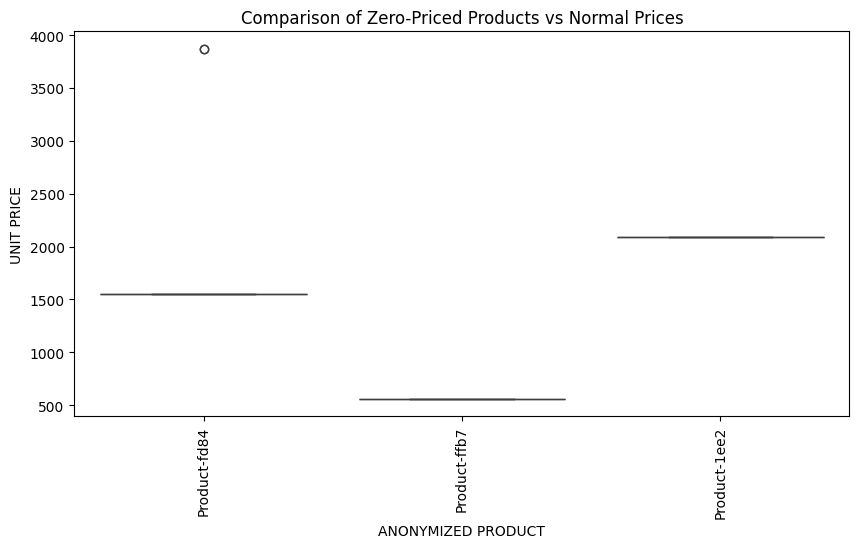

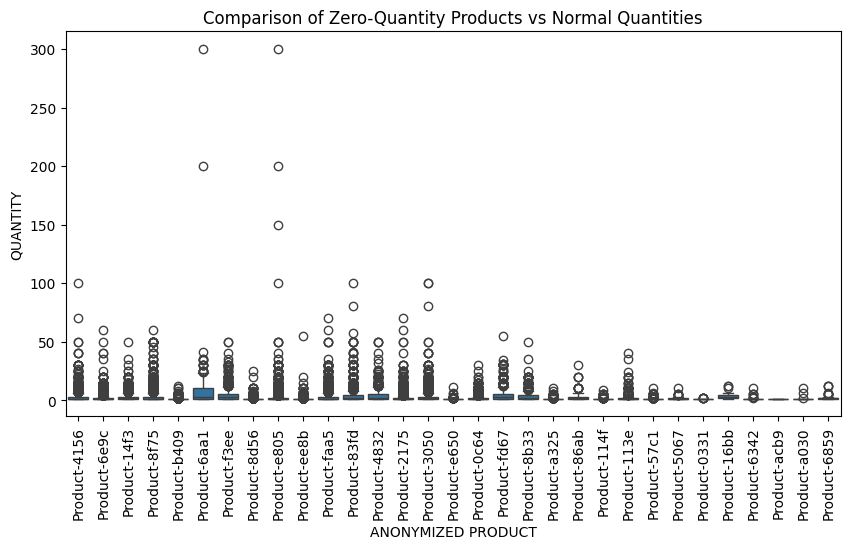

In [53]:
# Filter products that had zero unit price
zero_price_products = sales_df[sales_df["UNIT PRICE"] == 0]["ANONYMIZED PRODUCT"].unique()
zero_price_comparison = sales_df[sales_df["ANONYMIZED PRODUCT"].isin(zero_price_products)]

# Visualization 1: Distribution of unit prices (excluding zero values)
plt.figure(figsize=(10, 5))
sns.boxplot(x="ANONYMIZED PRODUCT", y="UNIT PRICE", data=zero_price_comparison[zero_price_comparison["UNIT PRICE"] > 0])
plt.xticks(rotation=90)
plt.title("Comparison of Zero-Priced Products vs Normal Prices")
plt.show()

# Filter products that had zero quantity
zero_quantity_products = sales_df[sales_df["QUANTITY"] == 0]["ANONYMIZED PRODUCT"].unique()
zero_quantity_comparison = sales_df[sales_df["ANONYMIZED PRODUCT"].isin(zero_quantity_products)]

# Visualization 2: Distribution of quantities (excluding zero values)
plt.figure(figsize=(10, 5))
sns.boxplot(x="ANONYMIZED PRODUCT", y="QUANTITY", data=zero_quantity_comparison[zero_quantity_comparison["QUANTITY"] > 0])
plt.xticks(rotation=90)
plt.title("Comparison of Zero-Quantity Products vs Normal Quantities")
plt.show()


In [54]:

# Step 1: Drop rows where quantity is zero
sales_df_cleaned = sales_df[sales_df["QUANTITY"] > 0].copy()

# Step 2: Find products with zero unit price
zero_price_products = sales_df_cleaned[sales_df_cleaned["UNIT PRICE"] == 0]["ANONYMIZED PRODUCT"].unique()

# Step 3: Replace zero prices with the most common price
for product in zero_price_products:
    common_price = sales_df_cleaned.loc[sales_df_cleaned["ANONYMIZED PRODUCT"] == product, "UNIT PRICE"]
    common_price = common_price[common_price > 0]  # Ignore zero prices
    
    if not common_price.empty:
        most_common_price = mode(common_price, keepdims=True).mode
        if most_common_price.size > 0:  # Ensure it's not empty
            sales_df_cleaned.loc[
                (sales_df_cleaned["ANONYMIZED PRODUCT"] == product) & (sales_df_cleaned["UNIT PRICE"] == 0),
                "UNIT PRICE"
            ] = most_common_price[0]  # Extract value safely

# Step 4: Flag & Drop Products where all Unit Prices are Zero
all_zero_price_products = sales_df_cleaned.groupby("ANONYMIZED PRODUCT")["UNIT PRICE"].nunique()
all_zero_price_products = all_zero_price_products[all_zero_price_products == 1].index.tolist()

# Ensure all prices are actually zero
all_zero_price_products = sales_df_cleaned[
    (sales_df_cleaned["ANONYMIZED PRODUCT"].isin(all_zero_price_products)) &
    (sales_df_cleaned["UNIT PRICE"] == 0)
]["ANONYMIZED PRODUCT"].unique().tolist()

# Print flagged products
print("Products where the only recorded price is zero:")
print(all_zero_price_products)

# Drop them from dataset
sales_df_cleaned = sales_df_cleaned[~sales_df_cleaned["ANONYMIZED PRODUCT"].isin(all_zero_price_products)]


Products where the only recorded price is zero:
['Product-9532', 'Product-38e9', 'Product-da0e', 'Product-5793', 'Product-c1d6', 'Product-482b', 'Product-9393', 'Product-cd8e', 'Product-6f02', 'Product-3dcf']


In [55]:
sales_df_cleaned

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0
...,...,...,...,...,...,...,...
333398,2024-11-13 13:59:00,Category-121,Product-898d,Business-0e99,Location-689f,5,1360.0
333401,2024-08-20 20:24:00,Category-106,Product-21f4,Business-72bc,Location-689f,1,850.0
333402,2024-08-20 20:24:00,Category-76,Product-6e9c,Business-72bc,Location-689f,1,2575.0
333403,2024-10-10 18:19:00,Category-91,Product-523e,Business-2693,Location-b27b,1,1520.0


In [56]:
sales_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 329823 entries, 0 to 333404
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE                 329823 non-null  datetime64[ns]
 1   ANONYMIZED CATEGORY  329823 non-null  object        
 2   ANONYMIZED PRODUCT   329823 non-null  object        
 3   ANONYMIZED BUSINESS  329823 non-null  object        
 4   ANONYMIZED LOCATION  329823 non-null  object        
 5   QUANTITY             329823 non-null  int64         
 6   UNIT PRICE           329823 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 20.1+ MB


In [57]:
sales_df_cleaned.describe()

,DATE,QUANTITY,UNIT PRICE
count,329823,329823.000000,329823.000000
mean,2024-07-18 11:58:31.771222784,2.321770,2319.132544
min,2024-01-01 05:54:00,1.000000,1.000000
25%,2024-04-30 16:34:00,1.000000,1420.000000
50%,2024-07-29 18:41:00,1.000000,1840.000000
75%,2024-10-14 21:33:30,2.000000,2750.000000
max,2024-12-31 18:24:00,359.000000,16136.000000
std,NaN,3.767878,1582.459186


/var/folders/zr/t17dd_4n2sgck29t3wnyv9f40000gn/T/ipykernel_32463/3031971086.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


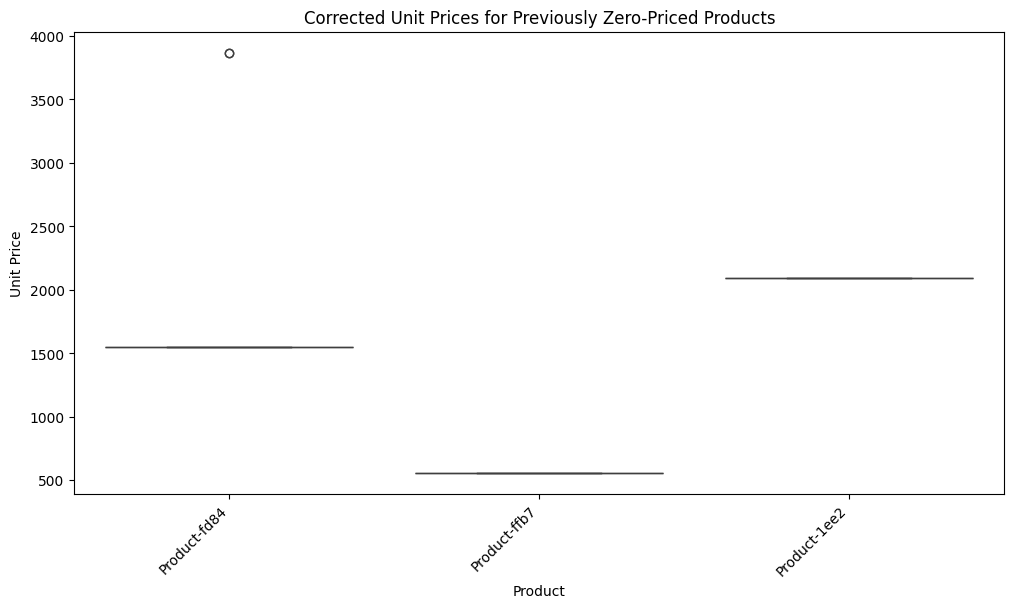

In [58]:
# Extract products that originally had zero prices
zero_price_products_df = sales_df[sales_df["UNIT PRICE"] == 0]

# Extract the same products after cleaning
fixed_price_products_df = sales_df_cleaned[sales_df_cleaned["ANONYMIZED PRODUCT"].isin(zero_price_products_df["ANONYMIZED PRODUCT"])]

# Plot comparison
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x="ANONYMIZED PRODUCT", y="UNIT PRICE", data=fixed_price_products_df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_title("Corrected Unit Prices for Previously Zero-Priced Products")
ax.set_xlabel("Product")
ax.set_ylabel("Unit Price")

plt.show()


Zero-Quantity Entries Before Cleaning: 38
Zero-Quantity Entries After Cleaning: 0


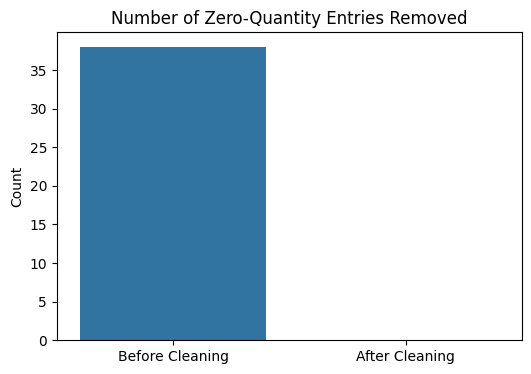

In [59]:
# Count of zero quantity products before and after
zero_quantity_before = sales_df[sales_df["QUANTITY"] == 0].shape[0]
zero_quantity_after = sales_df_cleaned[sales_df_cleaned["QUANTITY"] == 0].shape[0]

print(f"Zero-Quantity Entries Before Cleaning: {zero_quantity_before}")
print(f"Zero-Quantity Entries After Cleaning: {zero_quantity_after}")

# Bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=["Before Cleaning", "After Cleaning"], y=[zero_quantity_before, zero_quantity_after])
plt.title("Number of Zero-Quantity Entries Removed")
plt.ylabel("Count")
plt.show()


## Feature Engineering

### Create'Month-Year' column from 'DATE'

In [60]:
# Use to_datetime() and datetime.strftime() method
sales_df_cleaned['MONTH-YEAR'] = pd.to_datetime(sales_df_cleaned['DATE']).dt.strftime('%B %Y')
sales_df_cleaned.head(20)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,MONTH-YEAR
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,August 2024
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0,August 2024
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0,August 2024
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0,August 2024
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0,August 2024
5,2024-08-18 21:32:00,Category-76,Product-6e9c,Business-de42,Location-1ba8,1,2605.0,August 2024
6,2024-08-18 21:32:00,Category-120,Product-7864,Business-de42,Location-1ba8,1,1940.0,August 2024
7,2024-08-18 21:32:00,Category-119,Product-7940,Business-de42,Location-1ba8,4,1460.0,August 2024
8,2024-08-18 21:32:00,Category-96,Product-87b2,Business-de42,Location-1ba8,1,805.0,August 2024
9,2024-08-18 21:32:00,Category-106,Product-c14c,Business-de42,Location-1ba8,1,1350.0,August 2024


In [61]:
sales_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 329823 entries, 0 to 333404
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE                 329823 non-null  datetime64[ns]
 1   ANONYMIZED CATEGORY  329823 non-null  object        
 2   ANONYMIZED PRODUCT   329823 non-null  object        
 3   ANONYMIZED BUSINESS  329823 non-null  object        
 4   ANONYMIZED LOCATION  329823 non-null  object        
 5   QUANTITY             329823 non-null  int64         
 6   UNIT PRICE           329823 non-null  float64       
 7   MONTH-YEAR           329823 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 22.6+ MB


#### Create total value column

In [62]:
sales_df_cleaned['VALUE'] = sales_df_cleaned['QUANTITY'] * sales_df_cleaned['UNIT PRICE']

In [63]:
sales_df_cleaned.head(10) 

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,MONTH-YEAR,VALUE
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,August 2024,850.0
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0,August 2024,3820.0
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0,August 2024,3670.0
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0,August 2024,2605.0
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0,August 2024,7400.0
5,2024-08-18 21:32:00,Category-76,Product-6e9c,Business-de42,Location-1ba8,1,2605.0,August 2024,2605.0
6,2024-08-18 21:32:00,Category-120,Product-7864,Business-de42,Location-1ba8,1,1940.0,August 2024,1940.0
7,2024-08-18 21:32:00,Category-119,Product-7940,Business-de42,Location-1ba8,4,1460.0,August 2024,5840.0
8,2024-08-18 21:32:00,Category-96,Product-87b2,Business-de42,Location-1ba8,1,805.0,August 2024,805.0
9,2024-08-18 21:32:00,Category-106,Product-c14c,Business-de42,Location-1ba8,1,1350.0,August 2024,1350.0


## Exploratory Data Analysis

#### Grouping total quatity and value based on Anonymized Categories and Businesses

In [64]:
# Group data correctly
category_sales = sales_df_cleaned.groupby("ANONYMIZED CATEGORY").agg(
    Total_Quantity=("QUANTITY", "sum"),
    Total_Value=("VALUE", "sum")  
).reset_index()

# Display results
print(category_sales)

   ANONYMIZED CATEGORY  Total_Quantity  Total_Value
0         Category-100           76813  134902751.0
1         Category-101           19585   35614152.0
2         Category-102            1786     464463.0
3         Category-104            1217    1557598.0
4         Category-105            1579    2717069.0
5         Category-106            6521    5932763.0
6         Category-107            2730    4172372.0
7         Category-108            9756    5101375.0
8         Category-109            1446    1263226.0
9         Category-110           10528    5483946.0
10        Category-111            6715    4387343.0
11        Category-113             739    1254083.0
12        Category-114               3       8600.0
13        Category-115             348     425360.0
14        Category-116             856     422745.0
15        Category-117               5       1550.0
16        Category-118              21       7560.0
17        Category-119           68332  103454819.0
18        Ca

In [65]:
# Sorting data
top_10_quantity = category_sales.sort_values(by="Total_Quantity", ascending=False).head(10)
bottom_10_quantity = category_sales.sort_values(by="Total_Quantity", ascending=True).head(10)

top_10_value = category_sales.sort_values(by="Total_Value", ascending=False).head(10)
bottom_10_value = category_sales.sort_values(by="Total_Value", ascending=True).head(10)


In [68]:
top_10_quantity

,ANONYMIZED CATEGORY,Total_Quantity,Total_Value
18,Category-120,169715,319178743.0
25,Category-75,151330,544658700.0
0,Category-100,76813,134902751.0
26,Category-76,71718,344939553.0
17,Category-119,68332,103454819.0
27,Category-77,28433,76741382.0
40,Category-94,23670,16752565.0
34,Category-85,22997,33762533.0
38,Category-91,20853,44152103.0
1,Category-101,19585,35614152.0


In [69]:
bottom_10_quantity

,ANONYMIZED CATEGORY,Total_Quantity,Total_Value
12,Category-114,3,8600.0
22,Category-124,4,10060.0
15,Category-117,5,1550.0
35,Category-86,8,3320.0
37,Category-90,15,15750.0
16,Category-118,21,7560.0
23,Category-125,123,297060.0
30,Category-81,142,72061.0
36,Category-89,238,136850.0
21,Category-123,286,730730.0


In [70]:
top_10_value

,ANONYMIZED CATEGORY,Total_Quantity,Total_Value
25,Category-75,151330,544658700.0
26,Category-76,71718,344939553.0
18,Category-120,169715,319178743.0
0,Category-100,76813,134902751.0
17,Category-119,68332,103454819.0
27,Category-77,28433,76741382.0
38,Category-91,20853,44152103.0
1,Category-101,19585,35614152.0
34,Category-85,22997,33762533.0
19,Category-121,14669,22327643.0


In [71]:
bottom_10_value

,ANONYMIZED CATEGORY,Total_Quantity,Total_Value
15,Category-117,5,1550.0
35,Category-86,8,3320.0
16,Category-118,21,7560.0
12,Category-114,3,8600.0
22,Category-124,4,10060.0
37,Category-90,15,15750.0
30,Category-81,142,72061.0
36,Category-89,238,136850.0
23,Category-125,123,297060.0
14,Category-116,856,422745.0


- Plotting the results

/var/folders/zr/t17dd_4n2sgck29t3wnyv9f40000gn/T/ipykernel_32463/3314246944.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_quantity["ANONYMIZED CATEGORY"], x=top_10_quantity["Total_Quantity"], ax=axes[0, 0], palette="Blues_r")
/var/folders/zr/t17dd_4n2sgck29t3wnyv9f40000gn/T/ipykernel_32463/3314246944.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=bottom_10_quantity["ANONYMIZED CATEGORY"], x=bottom_10_quantity["Total_Quantity"], ax=axes[0, 1], palette="Reds_r")
/var/folders/zr/t17dd_4n2sgck29t3wnyv9f40000gn/T/ipykernel_32463/3314246944.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variabl

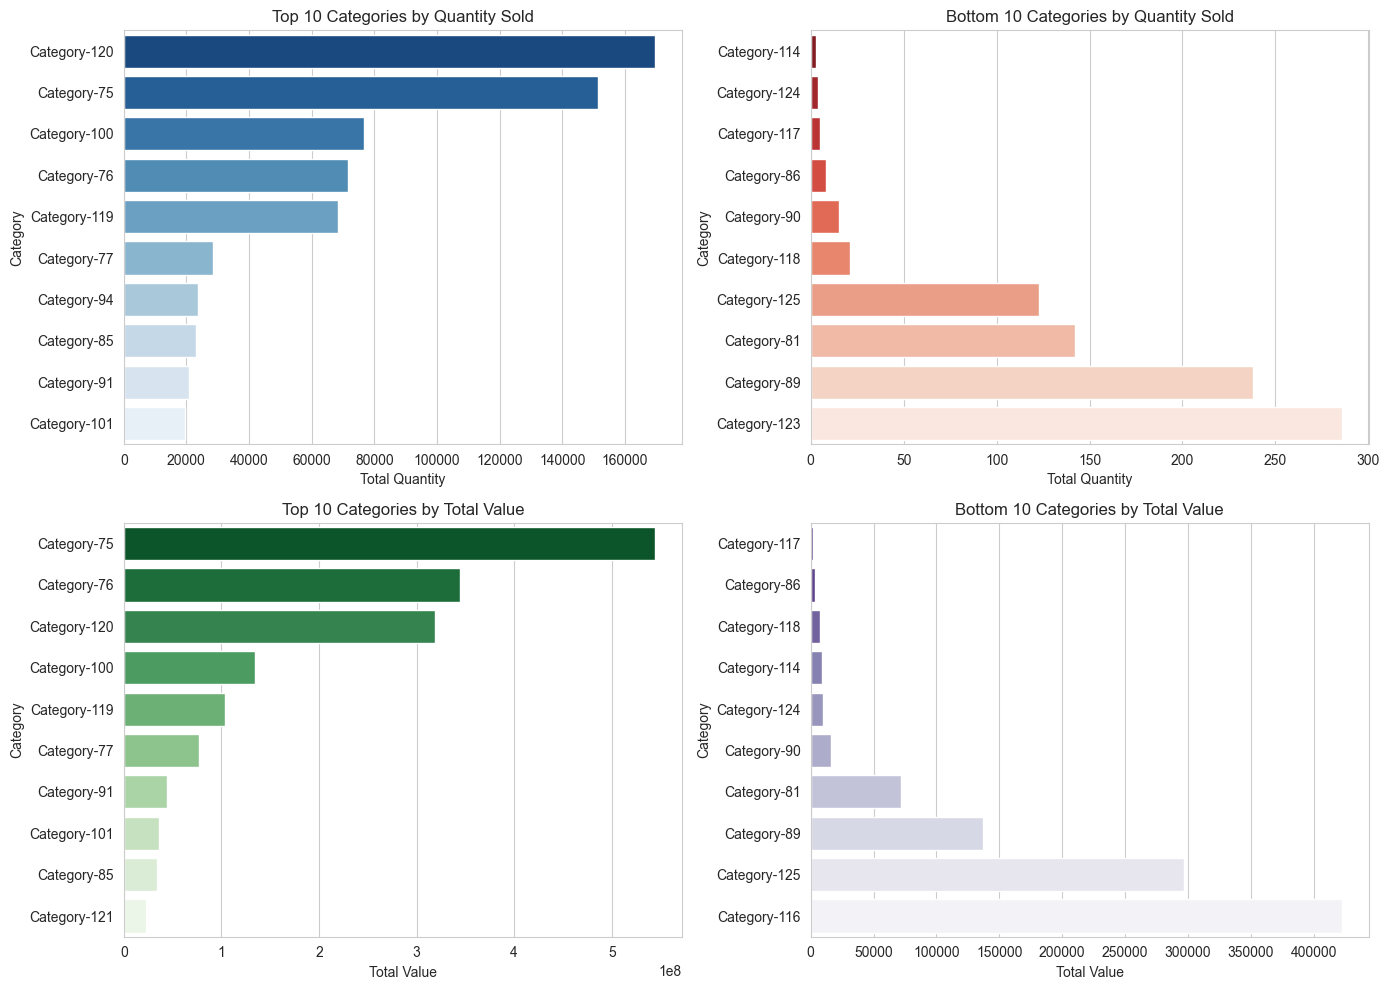

In [67]:
# Set style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top 10 Categories by Quantity
sns.barplot(y=top_10_quantity["ANONYMIZED CATEGORY"], x=top_10_quantity["Total_Quantity"], ax=axes[0, 0], palette="Blues_r")
axes[0, 0].set_title("Top 10 Categories by Quantity Sold")
axes[0, 0].set_xlabel("Total Quantity")
axes[0, 0].set_ylabel("Category")

# Bottom 10 Categories by Quantity
sns.barplot(y=bottom_10_quantity["ANONYMIZED CATEGORY"], x=bottom_10_quantity["Total_Quantity"], ax=axes[0, 1], palette="Reds_r")
axes[0, 1].set_title("Bottom 10 Categories by Quantity Sold")
axes[0, 1].set_xlabel("Total Quantity")
axes[0, 1].set_ylabel("Category")

# Top 10 Categories by Total Value
sns.barplot(y=top_10_value["ANONYMIZED CATEGORY"], x=top_10_value["Total_Value"], ax=axes[1, 0], palette="Greens_r")
axes[1, 0].set_title("Top 10 Categories by Total Value")
axes[1, 0].set_xlabel("Total Value")
axes[1, 0].set_ylabel("Category")

# Bottom 10 Categories by Total Value
sns.barplot(y=bottom_10_value["ANONYMIZED CATEGORY"], x=bottom_10_value["Total_Value"], ax=axes[1, 1], palette="Purples_r")
axes[1, 1].set_title("Bottom 10 Categories by Total Value")
axes[1, 1].set_xlabel("Total Value")
axes[1, 1].set_ylabel("Category")

# Adjust layout
plt.tight_layout()
plt.show()

### Correlation between Total Quantity and Total Value based on Category

In [72]:
# Compute Pearson correlation
category_correlation = category_sales["Total_Quantity"].corr(category_sales["Total_Value"])
print(f"Correlation between Total Quantity and Total Value: {category_correlation:.4f}")


Correlation between Total Quantity and Total Value: 0.9183


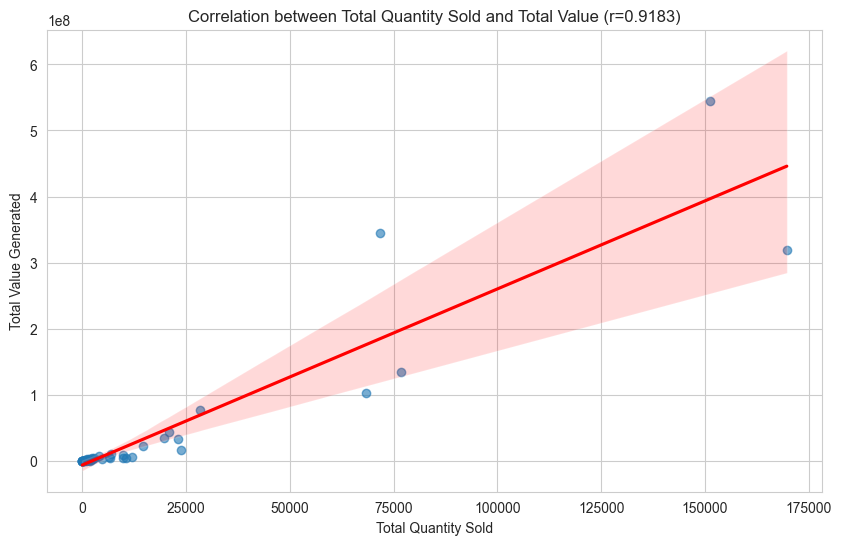

In [73]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x="Total_Quantity", y="Total_Value", data=category_sales, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.xlabel("Total Quantity Sold")
plt.ylabel("Total Value Generated")
plt.title(f"Correlation between Total Quantity Sold and Total Value (r={category_correlation:.4f})")
plt.show()

#### Sales overview based on Anonnymized Businesses

In [74]:
# Group data based on businesses
business_sales = sales_df_cleaned.groupby("ANONYMIZED BUSINESS").agg(
    Total_Quantity=("QUANTITY", "sum"),
    Total_Value=("VALUE", "sum")  
).reset_index()

# Display results
print(business_sales)

     ANONYMIZED BUSINESS  Total_Quantity  Total_Value
0          Business-0000               8      10445.0
1          Business-0005               1       2645.0
2          Business-0029              26      77340.0
3          Business-003d              98     221761.0
4          Business-0072             127     225056.0
...                  ...             ...          ...
4794       Business-ffa9               3       6740.0
4795       Business-ffae               6      10530.0
4796       Business-ffb1             266     438115.0
4797       Business-ffd2              37      67723.0
4798       Business-ffff             110     110285.0

[4799 rows x 3 columns]


In [75]:
# Sorting data
business_sales_top_10_quantity = business_sales.sort_values(by="Total_Quantity", ascending=False).head(10)
business_sales_bottom_10_quantity = business_sales.sort_values(by="Total_Quantity", ascending=True).head(10)

business_sales_top_10_value = business_sales.sort_values(by="Total_Value", ascending=False).head(10)
business_sales_bottom_10_value = business_sales.sort_values(by="Total_Value", ascending=True).head(10)

In [76]:
business_sales_top_10_quantity

,ANONYMIZED BUSINESS,Total_Quantity,Total_Value
2906,Business-978e,13991,28037358.0
1873,Business-6068,8214,16464195.0
4780,Business-fe7d,6743,26997121.0
2353,Business-7a03,6318,13968451.0
144,Business-07de,6065,16258068.0
3533,Business-ba13,5533,13650016.0
1385,Business-468e,5450,12546597.0
584,Business-1e3e,4981,13192967.0
3851,Business-cb1f,4636,9602700.0
2503,Business-80b3,4303,9275497.0


In [77]:
business_sales_bottom_10_quantity

,ANONYMIZED BUSINESS,Total_Quantity,Total_Value
1029,Business-34a7,1,4160.0
3055,Business-a172,1,4290.0
3048,Business-a149,1,2180.0
72,Business-0434,1,2070.0
66,Business-03bc,1,1530.0
2659,Business-88ce,1,1470.0
2658,Business-8896,1,2540.0
39,Business-0279,1,1930.0
3184,Business-a82f,1,1530.0
2020,Business-67c0,1,907.0


In [78]:
business_sales_top_10_value

,ANONYMIZED BUSINESS,Total_Quantity,Total_Value
2906,Business-978e,13991,28037358.0
4780,Business-fe7d,6743,26997121.0
1873,Business-6068,8214,16464195.0
144,Business-07de,6065,16258068.0
2353,Business-7a03,6318,13968451.0
3533,Business-ba13,5533,13650016.0
584,Business-1e3e,4981,13192967.0
1385,Business-468e,5450,12546597.0
4585,Business-f4f4,3852,11952941.0
1674,Business-5613,4089,11895552.0


In [79]:
business_sales_bottom_10_value

,ANONYMIZED BUSINESS,Total_Quantity,Total_Value
4060,Business-d78d,1,2.0
1478,Business-4b87,5,10.0
2616,Business-8654,1,55.0
3666,Business-c19b,1,55.0
364,Business-1320,1,85.0
561,Business-1d2d,1,90.0
1811,Business-5d91,1,90.0
4078,Business-d8af,1,90.0
1851,Business-5fa4,1,95.0
4036,Business-d64b,1,95.0


/var/folders/zr/t17dd_4n2sgck29t3wnyv9f40000gn/T/ipykernel_32463/4031185194.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=business_sales_top_10_quantity["ANONYMIZED BUSINESS"], x=business_sales_top_10_quantity["Total_Quantity"], ax=axes[0, 0], palette="Blues_r")
/var/folders/zr/t17dd_4n2sgck29t3wnyv9f40000gn/T/ipykernel_32463/4031185194.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=business_sales_bottom_10_quantity["ANONYMIZED BUSINESS"], x=business_sales_bottom_10_quantity["Total_Quantity"], ax=axes[0, 1], palette="Reds_r")
/var/folders/zr/t17dd_4n2sgck29t3wnyv9f40000gn/T/ipykernel_32463/4031185194.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is depre

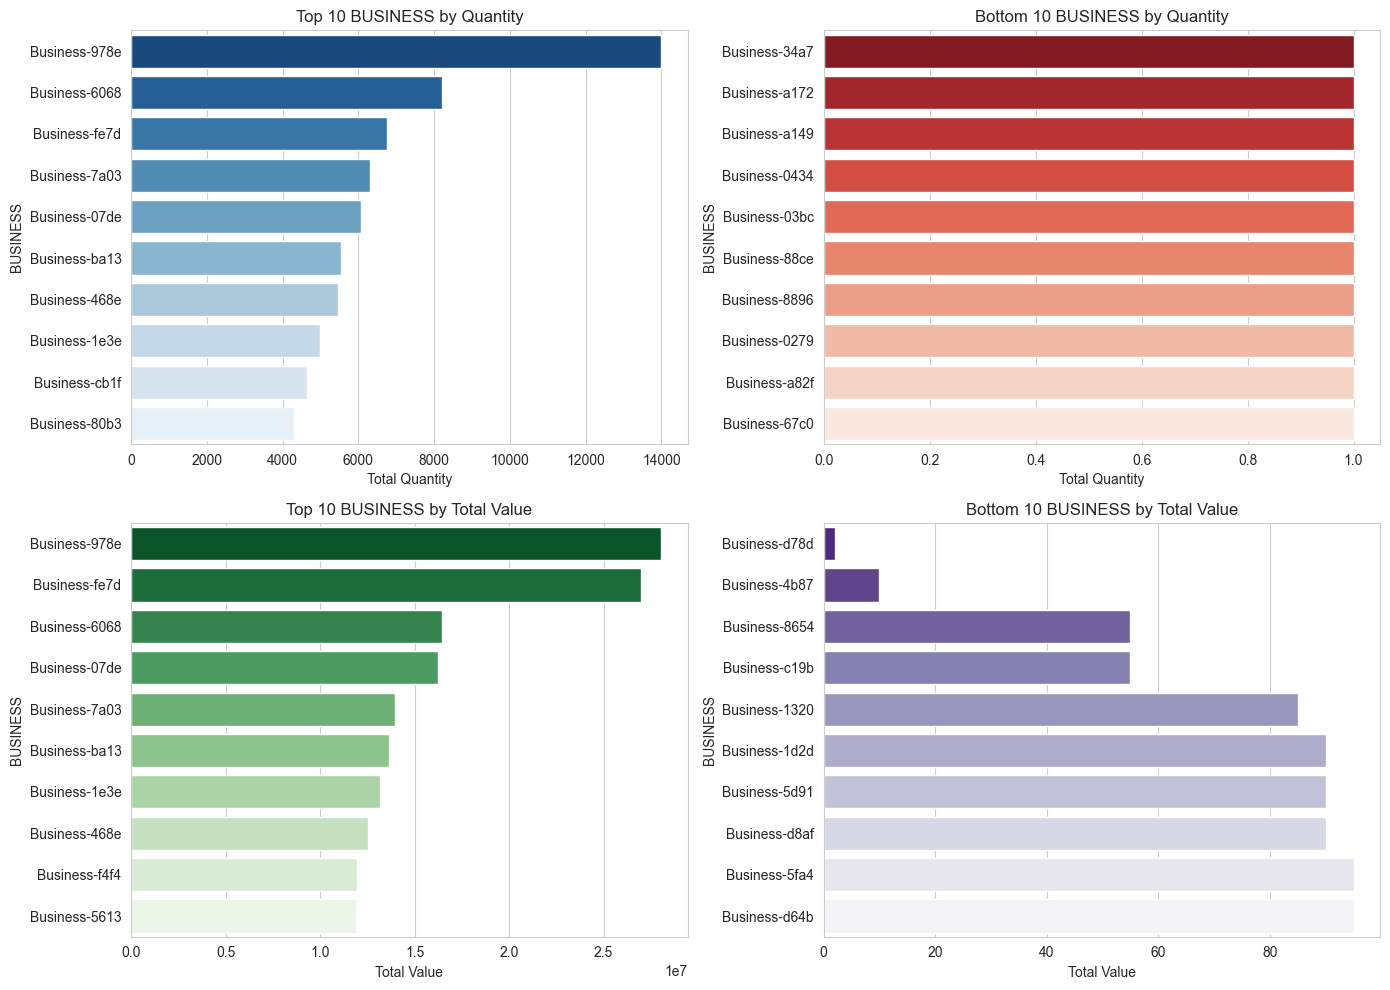

In [80]:
# Set style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top 10 Categories by Quantity
sns.barplot(y=business_sales_top_10_quantity["ANONYMIZED BUSINESS"], x=business_sales_top_10_quantity["Total_Quantity"], ax=axes[0, 0], palette="Blues_r")
axes[0, 0].set_title("Top 10 BUSINESS by Quantity")
axes[0, 0].set_xlabel("Total Quantity")
axes[0, 0].set_ylabel("BUSINESS")

# Bottom 10 Categories by Quantity
sns.barplot(y=business_sales_bottom_10_quantity["ANONYMIZED BUSINESS"], x=business_sales_bottom_10_quantity["Total_Quantity"], ax=axes[0, 1], palette="Reds_r")
axes[0, 1].set_title("Bottom 10 BUSINESS by Quantity")
axes[0, 1].set_xlabel("Total Quantity")
axes[0, 1].set_ylabel("BUSINESS")

# Top 10 Categories by Total Value
sns.barplot(y=business_sales_top_10_value["ANONYMIZED BUSINESS"], x=business_sales_top_10_value["Total_Value"], ax=axes[1, 0], palette="Greens_r")
axes[1, 0].set_title("Top 10 BUSINESS by Total Value")
axes[1, 0].set_xlabel("Total Value")
axes[1, 0].set_ylabel("BUSINESS")

# Bottom 10 Categories by Total Value
sns.barplot(y=business_sales_bottom_10_value["ANONYMIZED BUSINESS"], x=business_sales_bottom_10_value["Total_Value"], ax=axes[1, 1], palette="Purples_r")
axes[1, 1].set_title("Bottom 10 BUSINESS by Total Value")
axes[1, 1].set_xlabel("Total Value")
axes[1, 1].set_ylabel("BUSINESS")

# Adjust layout
plt.tight_layout()
plt.show()

#### Correlation between Total Quantity and Total Value based on Anonymized Businesses

In [81]:
# Compute Pearson correlation
business_correlation = business_sales["Total_Quantity"].corr(business_sales["Total_Value"])
print(f"Business Correlation between Total Quantity and Total Value: {business_correlation:.4f}")



Business Correlation between Total Quantity and Total Value: 0.9781


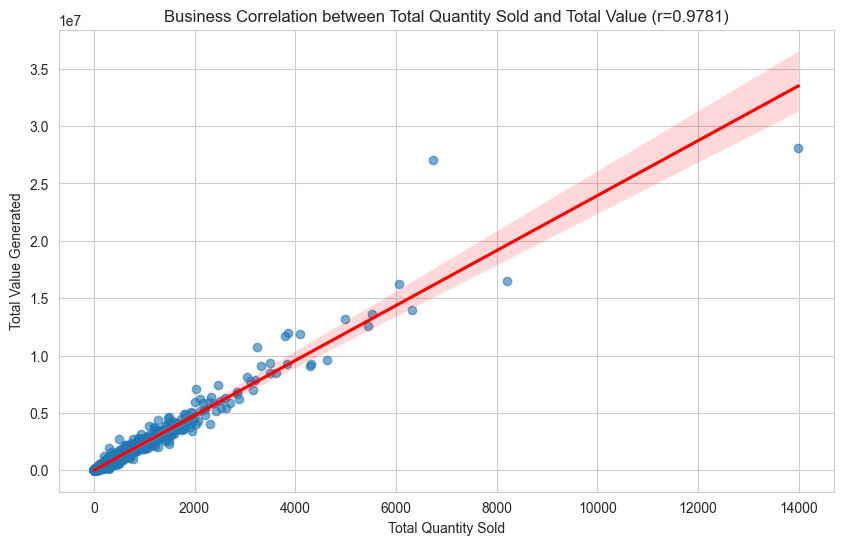

In [82]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x="Total_Quantity", y="Total_Value", data=business_sales, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.xlabel("Total Quantity Sold")
plt.ylabel("Total Value Generated")
plt.title(f"Business Correlation between Total Quantity Sold and Total Value (r={business_correlation:.4f})")
plt.show()

- Both categories and business attributes have a high correlation between total product quantity and total value.
- In categories, the correlationn betweenn total products sold and total value is 0.9183 whilein businesses, the correlation is 0.9781.
- This indicates that the more products that are sold, the more value. generated.
- Albeit a few outliers, this behaviour is as expected.

### Trends Over Time: Analyze sales trends (Value and Quantity) by Month-Year. Create a time series plot to show seasonal patterns or changes in sales performance.


In [83]:
# Aggregate total quantity and total value by Month-Year
monthly_sales = sales_df_cleaned.groupby("MONTH-YEAR").agg(
    Total_Quantity=("QUANTITY", "sum"),
    Total_Value=("VALUE", "sum")
).reset_index()

In [84]:
# Convert MONTH-YEAR to datetime format for proper sorting
monthly_sales["MONTHS"] = pd.to_datetime(monthly_sales["MONTH-YEAR"], format="%B %Y")

In [85]:
monthly_sales

,MONTH-YEAR,Total_Quantity,Total_Value,MONTHS
0,April 2024,50554,122110750.0,2024-04-01
1,August 2024,68859,146618908.0,2024-08-01
2,December 2024,57629,109557214.0,2024-12-01
3,February 2024,44060,126601942.0,2024-02-01
4,January 2024,67521,185632386.0,2024-01-01
5,July 2024,74680,171042631.0,2024-07-01
6,June 2024,60695,135140164.0,2024-06-01
7,March 2024,45379,116000676.0,2024-03-01
8,May 2024,69549,168782062.0,2024-05-01
9,November 2024,75361,165933104.0,2024-11-01


In [86]:
monthly_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   MONTH-YEAR      12 non-null     object        
 1   Total_Quantity  12 non-null     int64         
 2   Total_Value     12 non-null     float64       
 3   MONTHS          12 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 516.0+ bytes


In [87]:
monthly_sales.describe()

,Total_Quantity,Total_Value,MONTHS
count,12.000000,1.200000e+01,12
mean,63814.416667,1.474210e+08,2024-06-16 08:00:00
min,44060.000000,1.095572e+08,2024-01-01 00:00:00
25%,55860.250000,1.254791e+08,2024-03-24 06:00:00
50%,67134.000000,1.422052e+08,2024-06-16 00:00:00
75%,70831.750000,1.693472e+08,2024-09-08 12:00:00
max,84739.000000,1.856324e+08,2024-12-01 00:00:00
std,12518.441316,2.676939e+07,NaN


In [88]:
monthly_sales.sort_values('Total_Value', ascending=False)

,MONTH-YEAR,Total_Quantity,Total_Value,MONTHS
4,January 2024,67521,185632386.0,2024-01-01
10,October 2024,84739,183840551.0,2024-10-01
5,July 2024,74680,171042631.0,2024-07-01
8,May 2024,69549,168782062.0,2024-05-01
9,November 2024,75361,165933104.0,2024-11-01
1,August 2024,68859,146618908.0,2024-08-01
11,September 2024,66747,137791455.0,2024-09-01
6,June 2024,60695,135140164.0,2024-06-01
3,February 2024,44060,126601942.0,2024-02-01
0,April 2024,50554,122110750.0,2024-04-01


- The top 3 months in terms of value were January, October and July.
- The months that brought in the least value were December, March and April

In [89]:
monthly_sales = monthly_sales.sort_values('MONTHS')

In [90]:
monthly_sales

,MONTH-YEAR,Total_Quantity,Total_Value,MONTHS
4,January 2024,67521,185632386.0,2024-01-01
3,February 2024,44060,126601942.0,2024-02-01
7,March 2024,45379,116000676.0,2024-03-01
0,April 2024,50554,122110750.0,2024-04-01
8,May 2024,69549,168782062.0,2024-05-01
6,June 2024,60695,135140164.0,2024-06-01
5,July 2024,74680,171042631.0,2024-07-01
1,August 2024,68859,146618908.0,2024-08-01
11,September 2024,66747,137791455.0,2024-09-01
10,October 2024,84739,183840551.0,2024-10-01


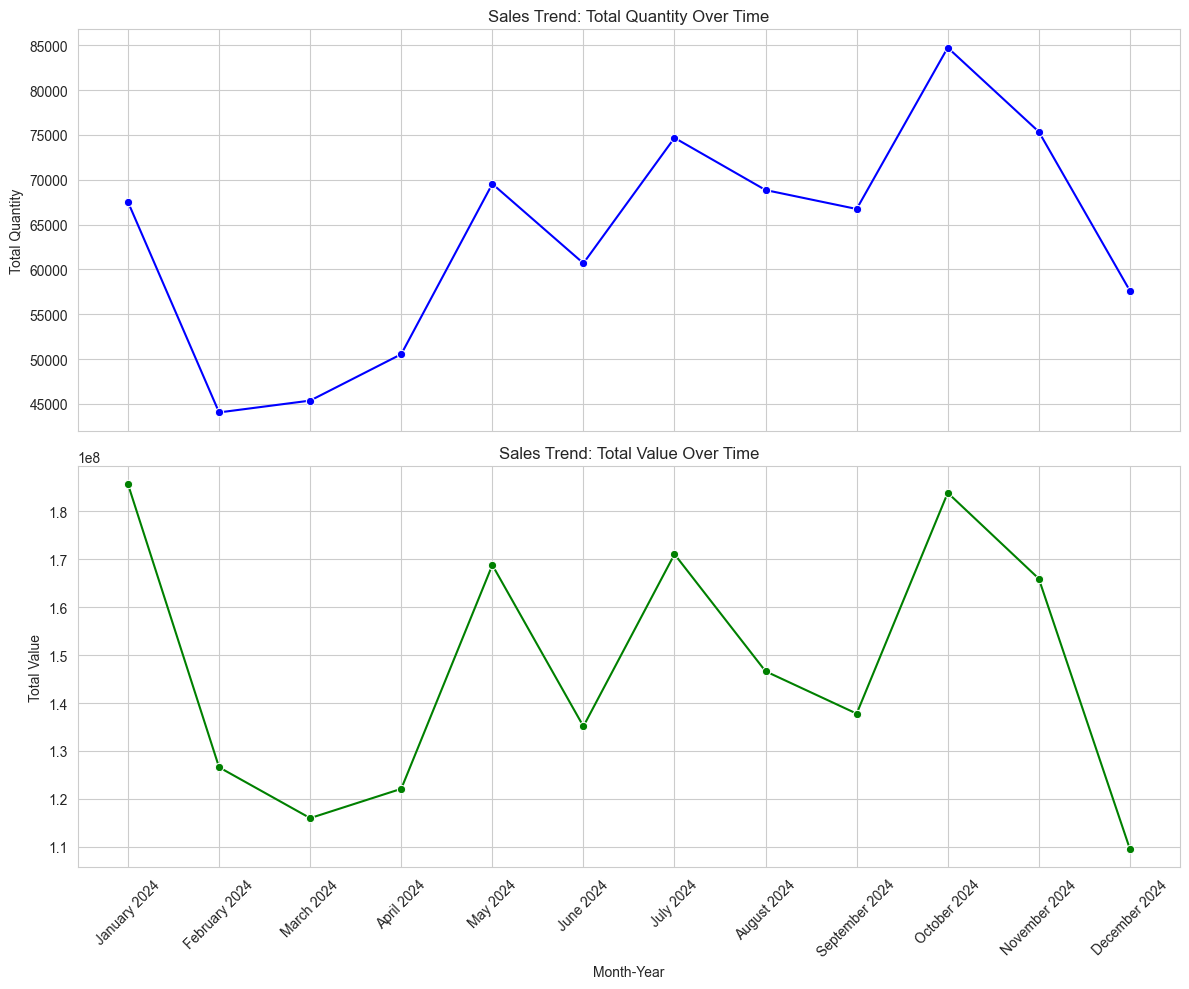

In [91]:
# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Total Quantity over time
sns.lineplot(data=monthly_sales, x="MONTH-YEAR", y="Total_Quantity", marker="o", ax=ax[0], color="b")
ax[0].set_title("Sales Trend: Total Quantity Over Time")
ax[0].set_ylabel("Total Quantity")
ax[0].grid(True)

# Total Value over time
sns.lineplot(data=monthly_sales, x="MONTH-YEAR", y="Total_Value", marker="o", ax=ax[1], color="g")
ax[1].set_title("Sales Trend: Total Value Over Time")
ax[1].set_ylabel("Total Value")
ax[1].grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.xlabel("Month-Year")

# Show plot
plt.tight_layout()
plt.show()


#### Performance Analysis

- Identify the top 5 most frequently purchased products (based on Quantity).
- Identify the top 5 most valuable products (based on Value

In [92]:
# Group by product and calculate total Quantity and Value
product_sales = sales_df_cleaned.groupby("ANONYMIZED PRODUCT").agg(
    Total_Quantity=("QUANTITY", "sum"),
    Total_Value=("VALUE", "sum")  
).reset_index()

# Top 5 most frequently purchased products (based on Quantity)
top_5_quantity = product_sales.nlargest(5, "Total_Quantity")

# Top 5 most valuable products (based on Value)
top_5_value = product_sales.nlargest(5, "Total_Value")

# Display results
print("Top 5 Most Frequently Purchased Products (by Quantity):")
print(top_5_quantity)

print("\nTop 5 Most Valuable Products (by Value):")
print(top_5_value)

Top 5 Most Frequently Purchased Products (by Quantity):
    ANONYMIZED PRODUCT  Total_Quantity  Total_Value
334       Product-66e0           46957   70704225.0
740       Product-e805           42602  262787281.0
471       Product-8f75           37566  158797460.0
127       Product-29ee           35940   68248274.0
211       Product-4156           28487   56956007.0

Top 5 Most Valuable Products (by Value):
    ANONYMIZED PRODUCT  Total_Quantity  Total_Value
740       Product-e805           42602  262787281.0
471       Product-8f75           37566  158797460.0
334       Product-66e0           46957   70704225.0
127       Product-29ee           35940   68248274.0
211       Product-4156           28487   56956007.0


/var/folders/zr/t17dd_4n2sgck29t3wnyv9f40000gn/T/ipykernel_32463/759248603.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_quantity, y="ANONYMIZED PRODUCT", x="Total_Quantity", ax=ax[0], palette="Blues_r")
/var/folders/zr/t17dd_4n2sgck29t3wnyv9f40000gn/T/ipykernel_32463/759248603.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_value, y="ANONYMIZED PRODUCT", x="Total_Value", ax=ax[1], palette="Greens_r")


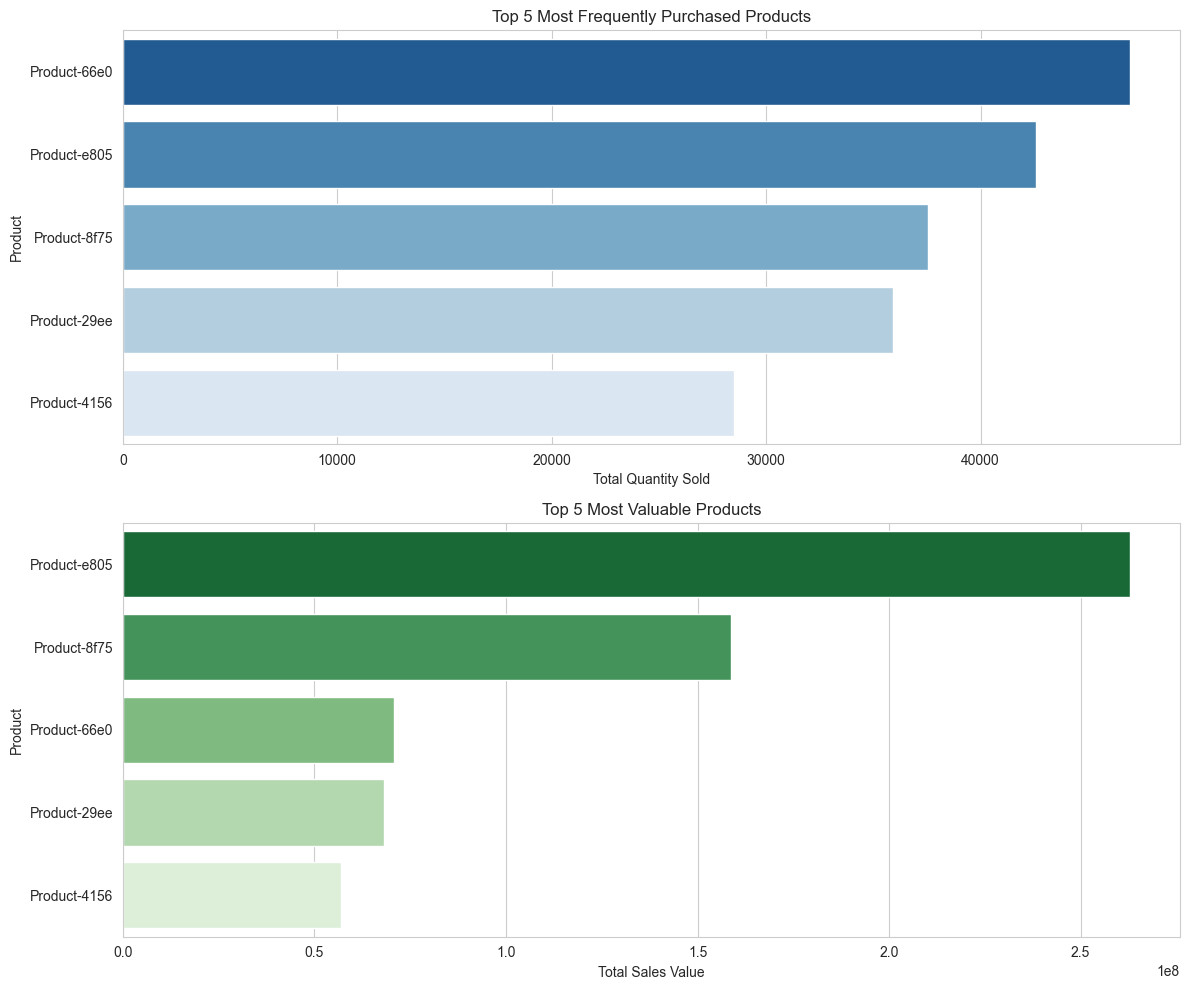

In [93]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Top 5 Products by Quantity
sns.barplot(data=top_5_quantity, y="ANONYMIZED PRODUCT", x="Total_Quantity", ax=ax[0], palette="Blues_r")
ax[0].set_title("Top 5 Most Frequently Purchased Products")
ax[0].set_xlabel("Total Quantity Sold")
ax[0].set_ylabel("Product")

# Top 5 Products by Value
sns.barplot(data=top_5_value, y="ANONYMIZED PRODUCT", x="Total_Value", ax=ax[1], palette="Greens_r")
ax[1].set_title("Top 5 Most Valuable Products")
ax[1].set_xlabel("Total Sales Value")
ax[1].set_ylabel("Product")

plt.tight_layout()
plt.show()


- The top 5 products in terms of quantity sold are also the top 5 in terms if value.

## Advanced Analysis

#### Customer Segmentation of Businesses

In [95]:
# Group by Business and calculate Total Quantity, Total Value, and Purchase Frequency
business_segmentation = sales_df_cleaned.groupby("ANONYMIZED BUSINESS").agg(
    Total_Quantity=("QUANTITY", "sum"),
    Total_Value=("VALUE", "sum"),
    Transaction_Frequency=("DATE", "count")  # Count of transactions
).reset_index()

# Display sample data
print(business_segmentation.head())


  ANONYMIZED BUSINESS  Total_Quantity  Total_Value  Transaction_Frequency
0       Business-0000               8      10445.0                      8
1       Business-0005               1       2645.0                      1
2       Business-0029              26      77340.0                      6
3       Business-003d              98     221761.0                     31
4       Business-0072             127     225056.0                    101


In [96]:
business_segmentation

,ANONYMIZED BUSINESS,Total_Quantity,Total_Value,Transaction_Frequency
0,Business-0000,8,10445.0,8
1,Business-0005,1,2645.0,1
2,Business-0029,26,77340.0,6
3,Business-003d,98,221761.0,31
4,Business-0072,127,225056.0,101
...,...,...,...,...
4794,Business-ffa9,3,6740.0,3
4795,Business-ffae,6,10530.0,5
4796,Business-ffb1,266,438115.0,105
4797,Business-ffd2,37,67723.0,22


In [97]:
business_segmentation.describe()

,Total_Quantity,Total_Value,Transaction_Frequency
count,4799.000000,4.799000e+03,4799.000000
mean,159.569285,3.686293e+05,68.727443
std,479.914320,1.175060e+06,149.033747
min,1.000000,2.000000e+00,1.000000
25%,5.000000,9.220000e+03,3.000000
50%,20.000000,4.190000e+04,11.000000
75%,114.000000,2.342840e+05,61.000000
max,13991.000000,2.803736e+07,2611.000000


- KMeans was used for clustering of the businesses into groups

In [107]:
from sklearn.cluster import KMeans
import numpy as np

# Select relevant features for clustering
features = business_segmentation[["Total_Quantity", "Total_Value", "Transaction_Frequency"]]

In [108]:
# Apply K-Means clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
business_segmentation["Customer_Segment"] = kmeans.fit_predict(features)

In [109]:
business_segmentation.head(25)

,ANONYMIZED BUSINESS,Total_Quantity,Total_Value,Transaction_Frequency,Customer_Segment
0,Business-0000,8,10445.0,8,0
1,Business-0005,1,2645.0,1,0
2,Business-0029,26,77340.0,6,0
3,Business-003d,98,221761.0,31,0
4,Business-0072,127,225056.0,101,0
5,Business-0078,317,1056525.0,254,0
6,Business-007a,2,4010.0,2,0
7,Business-0086,6,11200.0,6,0
8,Business-00a2,9,20685.0,7,0
9,Business-00a7,5,9425.0,1,0


In [110]:
business_segmentation.tail(20)

,ANONYMIZED BUSINESS,Total_Quantity,Total_Value,Transaction_Frequency,Customer_Segment
4779,Business-fe7b,630,1387235.0,173,0
4780,Business-fe7d,6743,26997121.0,653,1
4781,Business-fe7e,31,114720.0,26,0
4782,Business-fe8f,665,1986850.0,414,2
4783,Business-fe96,16,36780.0,16,0
4784,Business-fe97,12,12433.0,8,0
4785,Business-fed0,66,179997.0,59,0
4786,Business-fee4,4,8520.0,4,0
4787,Business-fef1,1864,4333095.0,1071,2
4788,Business-ff09,83,103505.0,62,0


In [111]:
# View the number of businesses in each segment
print(business_segmentation['Customer_Segment'].value_counts())

Customer_Segment
0    4522
2     254
1      23
Name: count, dtype: int64


In [112]:
# View summary statistics for each cluster
cluster_summary = business_segmentation.groupby('Customer_Segment').agg({
    'Transaction_Frequency': ['mean', 'std'],
    'Total_Quantity': ['mean', 'std'],
    'Total_Value': ['mean', 'std']
})

print(cluster_summary)

                 Transaction_Frequency             Total_Quantity  \
                                  mean         std           mean   
Customer_Segment                                                    
0                            42.701902   74.668273      75.990712   
1                           922.826087  556.167131    4896.000000   
2                           454.724409  258.239699    1218.641732   

                                Total_Value                
                          std          mean           std  
Customer_Segment                                           
0                  127.754380  1.612587e+05  2.788377e+05  
1                 2397.199389  1.234302e+07  5.420628e+06  
2                  534.916123  2.976184e+06  1.269296e+06  


There are 3segments. 
- Segment 0 has the least frequency,  quantity and value so we can group them as Low value businesses. It also has the highest count for businesses.
- Segment 1 has the highest frequency,  quantity and value so we can group them as High value businesses. It has the least count of businesses.
- Segement 2 lies in the middlein all frequency,  quantity and value so we can group them as Medium value businesses.

In [113]:
# Rename clusters based on their value contribution
segment_mapping = {0: "Low Value", 1: "High Value", 2: "Medium Value"}
business_segmentation["Customer_Segment"] = business_segmentation["Customer_Segment"].map(segment_mapping)

# Display sample results
print(business_segmentation.head())

  ANONYMIZED BUSINESS  Total_Quantity  Total_Value  Transaction_Frequency  \
0       Business-0000               8      10445.0                      8   
1       Business-0005               1       2645.0                      1   
2       Business-0029              26      77340.0                      6   
3       Business-003d              98     221761.0                     31   
4       Business-0072             127     225056.0                    101   

  Customer_Segment  
0        Low Value  
1        Low Value  
2        Low Value  
3        Low Value  
4        Low Value  


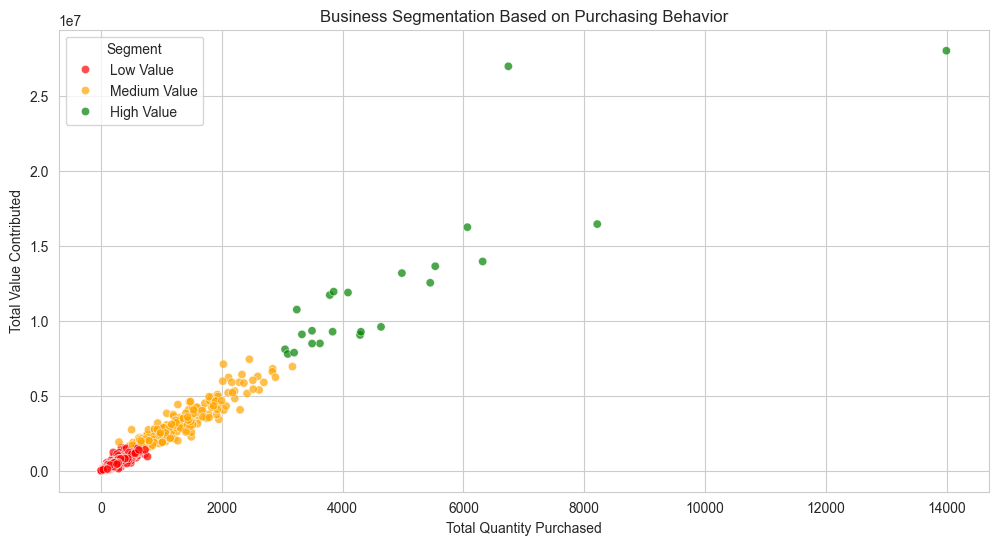

In [114]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=business_segmentation,
    x="Total_Quantity",
    y="Total_Value",
    hue="Customer_Segment",
    palette={"Low Value": "red", "Medium Value": "orange", "High Value": "green"},
    alpha=0.7
)
plt.title("Business Segmentation Based on Purchasing Behavior")
plt.xlabel("Total Quantity Purchased")
plt.ylabel("Total Value Contributed")
plt.legend(title="Segment")
plt.show()


- The visual above also show that businesses that buymore products generate more value in sales

### Using RFM (Recency, Freequency and. Monnetary) in Customer Segmentation

- Here, we will introduce an additional attribute by considering how recent a businness made a sales order.

In [115]:
sales_df_cleaned.head(20)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,MONTH-YEAR,VALUE
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,August 2024,850.0
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0,August 2024,3820.0
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0,August 2024,3670.0
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0,August 2024,2605.0
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0,August 2024,7400.0
5,2024-08-18 21:32:00,Category-76,Product-6e9c,Business-de42,Location-1ba8,1,2605.0,August 2024,2605.0
6,2024-08-18 21:32:00,Category-120,Product-7864,Business-de42,Location-1ba8,1,1940.0,August 2024,1940.0
7,2024-08-18 21:32:00,Category-119,Product-7940,Business-de42,Location-1ba8,4,1460.0,August 2024,5840.0
8,2024-08-18 21:32:00,Category-96,Product-87b2,Business-de42,Location-1ba8,1,805.0,August 2024,805.0
9,2024-08-18 21:32:00,Category-106,Product-c14c,Business-de42,Location-1ba8,1,1350.0,August 2024,1350.0


In [116]:
sales_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 329823 entries, 0 to 333404
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE                 329823 non-null  datetime64[ns]
 1   ANONYMIZED CATEGORY  329823 non-null  object        
 2   ANONYMIZED PRODUCT   329823 non-null  object        
 3   ANONYMIZED BUSINESS  329823 non-null  object        
 4   ANONYMIZED LOCATION  329823 non-null  object        
 5   QUANTITY             329823 non-null  int64         
 6   UNIT PRICE           329823 non-null  float64       
 7   MONTH-YEAR           329823 non-null  object        
 8   VALUE                329823 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 25.2+ MB


In [117]:
sales_df_cleaned.describe()

,DATE,QUANTITY,UNIT PRICE,VALUE
count,329823,329823.000000,329823.000000,3.298230e+05
mean,2024-07-18 11:58:31.771222784,2.321770,2319.132544,5.363640e+03
min,2024-01-01 05:54:00,1.000000,1.000000,1.000000e+00
25%,2024-04-30 16:34:00,1.000000,1420.000000,1.520000e+03
50%,2024-07-29 18:41:00,1.000000,1840.000000,2.745000e+03
75%,2024-10-14 21:33:30,2.000000,2750.000000,5.567500e+03
max,2024-12-31 18:24:00,359.000000,16136.000000,1.914000e+06
std,NaN,3.767878,1582.459186,1.094475e+04


##### Recency:
- Since the days range between 1stJan 2024 and 31st Dec 2024, we'll use 1stJan 2025 as end date (most recent date)

In [118]:
# Define the last transaction date in the dataset
last_transaction_date = sales_df_cleaned["DATE"].max()

# Find the most recent purchase date per business
recency_df = sales_df_cleaned.groupby("ANONYMIZED BUSINESS")["DATE"].max().reset_index()
recency_df.columns = ["ANONYMIZED BUSINESS", "LAST_SALE_DATE"]

# Calculate recency as days difference, then normalize
recency_df["recency"] = (last_transaction_date - recency_df["LAST_SALE_DATE"]).dt.days + 1  # Add 1 to start from 1

# Display the results
print(recency_df)

     ANONYMIZED BUSINESS      LAST_SALE_DATE  recency
0          Business-0000 2024-12-26 19:28:00        5
1          Business-0005 2024-05-31 10:49:00      215
2          Business-0029 2024-05-14 20:19:00      231
3          Business-003d 2024-12-08 18:52:00       23
4          Business-0072 2024-12-15 18:40:00       16
...                  ...                 ...      ...
4794       Business-ffa9 2024-04-10 21:00:00      265
4795       Business-ffae 2024-06-13 13:47:00      202
4796       Business-ffb1 2024-10-25 21:51:00       67
4797       Business-ffd2 2024-09-26 20:36:00       96
4798       Business-ffff 2024-12-20 16:39:00       12

[4799 rows x 3 columns]


In [119]:
recency_df

,ANONYMIZED BUSINESS,LAST_SALE_DATE,recency
0,Business-0000,2024-12-26 19:28:00,5
1,Business-0005,2024-05-31 10:49:00,215
2,Business-0029,2024-05-14 20:19:00,231
3,Business-003d,2024-12-08 18:52:00,23
4,Business-0072,2024-12-15 18:40:00,16
...,...,...,...
4794,Business-ffa9,2024-04-10 21:00:00,265
4795,Business-ffae,2024-06-13 13:47:00,202
4796,Business-ffb1,2024-10-25 21:51:00,67
4797,Business-ffd2,2024-09-26 20:36:00,96


In [120]:
recency_df.describe()

,LAST_SALE_DATE,recency
count,4799,4799.000000
mean,2024-09-22 12:22:29.918733056,100.756199
min,2024-01-01 07:18:00,1.000000
25%,2024-07-16 20:08:00,14.000000
50%,2024-10-09 14:28:00,84.000000
75%,2024-12-17 20:58:30,168.000000
max,2024-12-31 18:24:00,366.000000
std,NaN,91.498177


In [121]:
recency_df.nunique()

ANONYMIZED BUSINESS    4799
LAST_SALE_DATE         4585
recency                 347
dtype: int64

In [122]:
# Sort by recency in descending order to get businesses with least recent purchases
least_recent_purchases = recency_df.sort_values(by="recency", ascending=False)

# Display top 10 businesses with the highest recency
print(least_recent_purchases.head(10))

     ANONYMIZED BUSINESS      LAST_SALE_DATE  recency
4062       Business-d7a8 2024-01-01 07:18:00      366
399        Business-153f 2024-01-02 17:16:00      365
809        Business-28da 2024-01-02 17:15:00      365
3250       Business-abb8 2024-01-01 19:06:00      365
3696       Business-c33f 2024-01-03 17:46:00      364
2284       Business-7623 2024-01-03 17:45:00      364
328        Business-1153 2024-01-02 19:41:00      364
2973       Business-9beb 2024-01-04 09:14:00      363
2931       Business-9917 2024-01-04 23:11:00      362
2205       Business-71e2 2024-01-05 17:15:00      362


##### Frequency - number of transactions made per business

In [123]:
# Calculate frequency (total number of transactions per business)
frequency_df = sales_df_cleaned.groupby("ANONYMIZED BUSINESS")["DATE"].count().reset_index()

# Rename columns for clarity
frequency_df.rename(columns={"DATE": "frequency"}, inplace=True)

# Sort businesses by transaction frequency (highest first)
frequency_df = frequency_df.sort_values(by="frequency", ascending=False)

# Display the top 10 businesses with the highest frequency
print(frequency_df.head(10))


     ANONYMIZED BUSINESS  frequency
2906       Business-978e       2611
277        Business-0e5b       1919
1873       Business-6068       1474
1555       Business-4fee       1290
1941       Business-63d9       1285
2503       Business-80b3       1236
144        Business-07de       1160
2353       Business-7a03       1147
4130       Business-dbce       1126
4585       Business-f4f4       1112


##### Q.] How would. you categorise quantity inn this situation? Value. or frequency?

In [124]:
# Sum total quantity purchased per business
total_quantity_per_business = (
    sales_df_cleaned.groupby("ANONYMIZED BUSINESS")["QUANTITY"]
    .sum()
    .reset_index()
)

# Rename column for clarity
total_quantity_per_business.rename(columns={"QUANTITY": "total_quantity_purchased"}, inplace=True)

# Sort businesses by total quantity purchased (highest first)
total_quantity_per_business = total_quantity_per_business.sort_values(by="total_quantity_purchased", ascending=False)

# Display results
print(total_quantity_per_business.head(10))  # Show top 10 businesses


     ANONYMIZED BUSINESS  total_quantity_purchased
2906       Business-978e                     13991
1873       Business-6068                      8214
4780       Business-fe7d                      6743
2353       Business-7a03                      6318
144        Business-07de                      6065
3533       Business-ba13                      5533
1385       Business-468e                      5450
584        Business-1e3e                      4981
3851       Business-cb1f                      4636
2503       Business-80b3                      4303


##### Monetary -  how much value did each business bring?

In [125]:
# Grouping by business and summing the 'VALUE' to calculate total value per business
total_value_per_business = sales_df_cleaned.groupby('ANONYMIZED BUSINESS')['VALUE'].sum().reset_index()

# Renaming the column for clarity
total_value_per_business.rename(columns={'VALUE': 'TOTAL_VALUE'}, inplace=True)

# Merging with your other dataframes (if needed)
# Assuming recency_df, frequency_df, and total_quantity_per_business are already created
# You can merge them on the 'ANONYMIZED BUSINESS' column

customer_data = recency_df.merge(frequency_df, on='ANONYMIZED BUSINESS', how='left')
customer_data = customer_data.merge(total_quantity_per_business, on='ANONYMIZED BUSINESS', how='left')
customer_data = customer_data.merge(total_value_per_business, on='ANONYMIZED BUSINESS', how='left')



In [126]:
customer_data

,ANONYMIZED BUSINESS,LAST_SALE_DATE,recency,frequency,total_quantity_purchased,TOTAL_VALUE
0,Business-0000,2024-12-26 19:28:00,5,8,8,10445.0
1,Business-0005,2024-05-31 10:49:00,215,1,1,2645.0
2,Business-0029,2024-05-14 20:19:00,231,6,26,77340.0
3,Business-003d,2024-12-08 18:52:00,23,31,98,221761.0
4,Business-0072,2024-12-15 18:40:00,16,101,127,225056.0
...,...,...,...,...,...,...
4794,Business-ffa9,2024-04-10 21:00:00,265,3,3,6740.0
4795,Business-ffae,2024-06-13 13:47:00,202,5,6,10530.0
4796,Business-ffb1,2024-10-25 21:51:00,67,105,266,438115.0
4797,Business-ffd2,2024-09-26 20:36:00,96,22,37,67723.0


In [127]:
customer_data = customer_data.drop(columns=['LAST_SALE_DATE'])


- Here, we use StandardScalar to try and have standardized values so as to perform KMeans Clusterinng

In [128]:
from sklearn.preprocessing import StandardScaler

# Standardize the data (without 'ANONYMIZED BUSINESS' column)
features = customer_data.drop(columns=['ANONYMIZED BUSINESS'])

scaler = StandardScaler()
standardized_data = scaler.fit_transform(features)


In [129]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(standardized_data)


In [130]:
# View the number of businesses in each segment
print(customer_data['Cluster'].value_counts())

# View summary statistics for each cluster
cluster_summary = customer_data.groupby('Cluster').agg({
    'recency': ['mean', 'std'],
    'frequency': ['mean', 'std'],
    'total_quantity_purchased': ['mean', 'std'],
    'TOTAL_VALUE': ['mean', 'std']
})

print(cluster_summary)

Cluster
0    2542
1    2058
2     199
Name: count, dtype: int64
            recency              frequency              \
               mean        std        mean         std   
Cluster                                                  
0         35.561762  33.417080   75.362707   94.240424   
1        189.980564  63.860237    8.487852   15.008152   
2         10.809045  26.985288  606.949749  304.105590   

        total_quantity_purchased                TOTAL_VALUE                
                            mean          std          mean           std  
Cluster                                                                    
0                     143.671912   191.334859  3.127067e+05  4.574865e+05  
1                      19.553936    50.861239  4.821644e+04  1.445589e+05  
2                    1810.638191  1462.065973  4.396593e+06  3.625255e+06  


In [131]:
customer_data['Cluster'] = customer_data['Cluster'].map({
    0: 'Medium Value', 
    1: 'Low Value',  
    2: 'High Value'
})

customer_data.head()

,ANONYMIZED BUSINESS,recency,frequency,total_quantity_purchased,TOTAL_VALUE,Cluster
0,Business-0000,5,8,8,10445.0,Medium Value
1,Business-0005,215,1,1,2645.0,Low Value
2,Business-0029,231,6,26,77340.0,Low Value
3,Business-003d,23,31,98,221761.0,Medium Value
4,Business-0072,16,101,127,225056.0,Medium Value


In [132]:
customer_data

,ANONYMIZED BUSINESS,recency,frequency,total_quantity_purchased,TOTAL_VALUE,Cluster
0,Business-0000,5,8,8,10445.0,Medium Value
1,Business-0005,215,1,1,2645.0,Low Value
2,Business-0029,231,6,26,77340.0,Low Value
3,Business-003d,23,31,98,221761.0,Medium Value
4,Business-0072,16,101,127,225056.0,Medium Value
...,...,...,...,...,...,...
4794,Business-ffa9,265,3,3,6740.0,Low Value
4795,Business-ffae,202,5,6,10530.0,Low Value
4796,Business-ffb1,67,105,266,438115.0,Medium Value
4797,Business-ffd2,96,22,37,67723.0,Medium Value


/var/folders/zr/t17dd_4n2sgck29t3wnyv9f40000gn/T/ipykernel_32463/3999102414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_data, x='Cluster', palette='viridis')


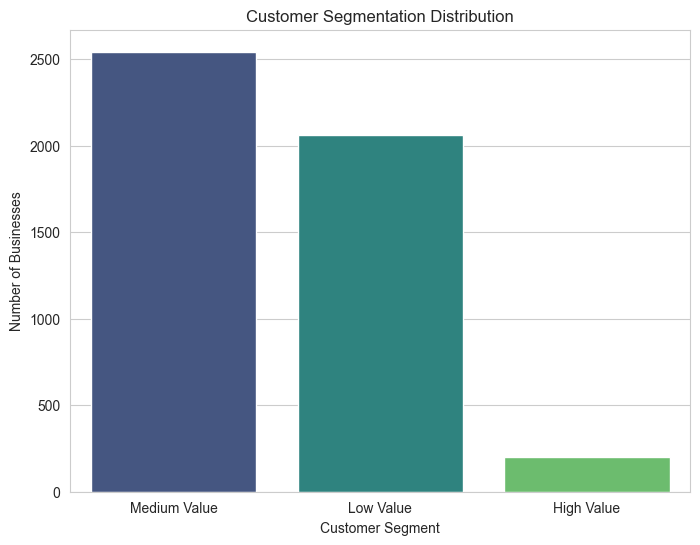

In [133]:
# Plot the distribution of businesses in each cluster
plt.figure(figsize=(8, 6))
sns.countplot(data=customer_data, x='Cluster', palette='viridis')
plt.title('Customer Segmentation Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Businesses')
plt.show()

/var/folders/zr/t17dd_4n2sgck29t3wnyv9f40000gn/T/ipykernel_32463/3890865487.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_data, x='Cluster', y='recency', palette='viridis')


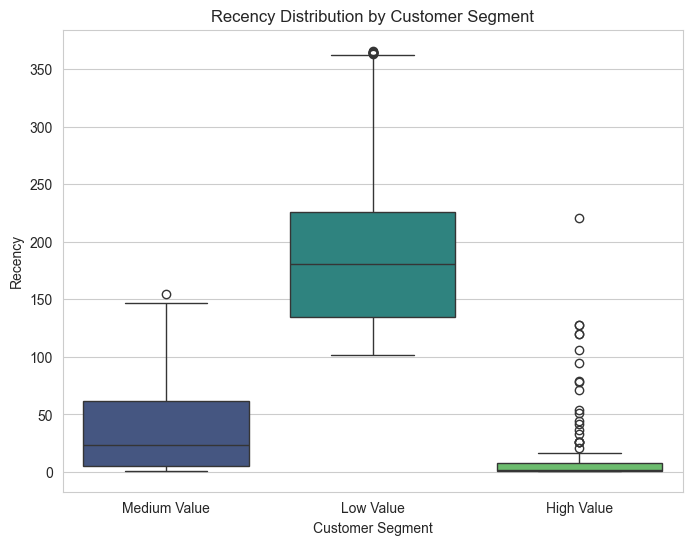

/var/folders/zr/t17dd_4n2sgck29t3wnyv9f40000gn/T/ipykernel_32463/3890865487.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_data, x='Cluster', y='frequency', palette='viridis')


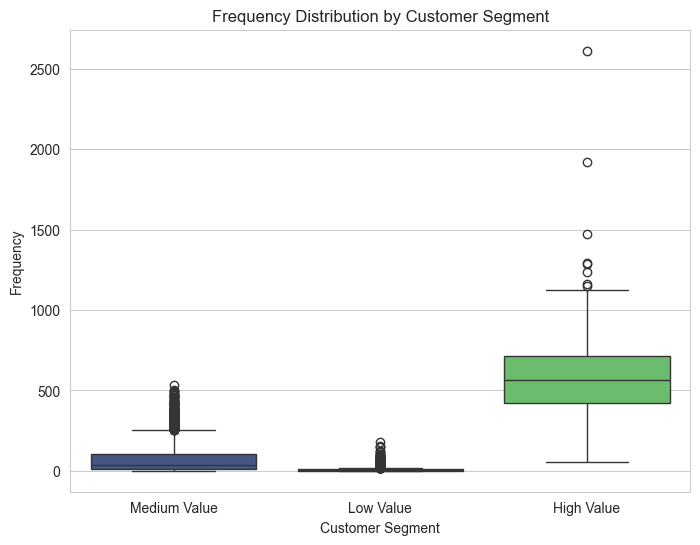

/var/folders/zr/t17dd_4n2sgck29t3wnyv9f40000gn/T/ipykernel_32463/3890865487.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_data, x='Cluster', y='TOTAL_VALUE', palette='viridis')


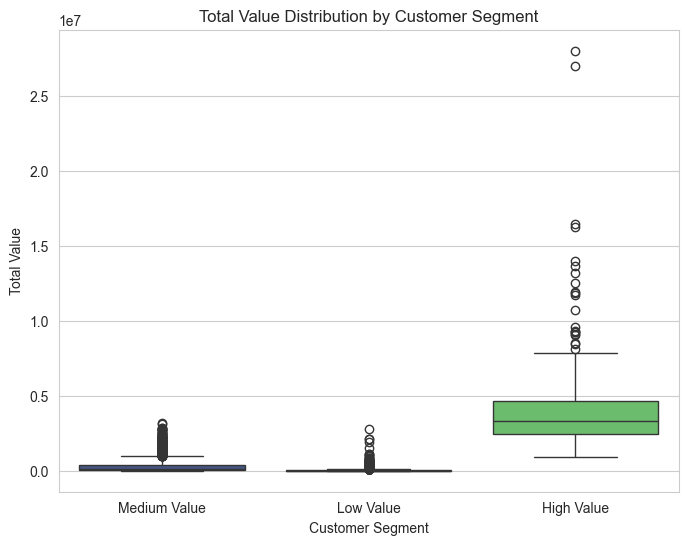

In [134]:
# Box plot for Recency
plt.figure(figsize=(8, 6))
sns.boxplot(data=customer_data, x='Cluster', y='recency', palette='viridis')
plt.title('Recency Distribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Recency')
plt.show()

# Box plot for Frequency
plt.figure(figsize=(8, 6))
sns.boxplot(data=customer_data, x='Cluster', y='frequency', palette='viridis')
plt.title('Frequency Distribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Frequency')
plt.show()

# Box plot for Total Value
plt.figure(figsize=(8, 6))
sns.boxplot(data=customer_data, x='Cluster', y='TOTAL_VALUE', palette='viridis')
plt.title('Total Value Distribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Value')
plt.show()


### Forecasting

In [135]:
monthly_sales

,MONTH-YEAR,Total_Quantity,Total_Value,MONTHS
4,January 2024,67521,185632386.0,2024-01-01
3,February 2024,44060,126601942.0,2024-02-01
7,March 2024,45379,116000676.0,2024-03-01
0,April 2024,50554,122110750.0,2024-04-01
8,May 2024,69549,168782062.0,2024-05-01
6,June 2024,60695,135140164.0,2024-06-01
5,July 2024,74680,171042631.0,2024-07-01
1,August 2024,68859,146618908.0,2024-08-01
11,September 2024,66747,137791455.0,2024-09-01
10,October 2024,84739,183840551.0,2024-10-01


In [136]:
# Set datetime index
monthly_sales.set_index("MONTHS", inplace=True)

In [137]:
monthly_sales

,MONTH-YEAR,Total_Quantity,Total_Value
MONTHS,,,
2024-01-01,January 2024,67521,185632386.0
2024-02-01,February 2024,44060,126601942.0
2024-03-01,March 2024,45379,116000676.0
2024-04-01,April 2024,50554,122110750.0
2024-05-01,May 2024,69549,168782062.0
2024-06-01,June 2024,60695,135140164.0
2024-07-01,July 2024,74680,171042631.0
2024-08-01,August 2024,68859,146618908.0
2024-09-01,September 2024,66747,137791455.0


#### Moving Average

/var/folders/zr/t17dd_4n2sgck29t3wnyv9f40000gn/T/ipykernel_32463/2328108968.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=ts.index[-forecast_steps], periods=forecast_steps, freq='M')


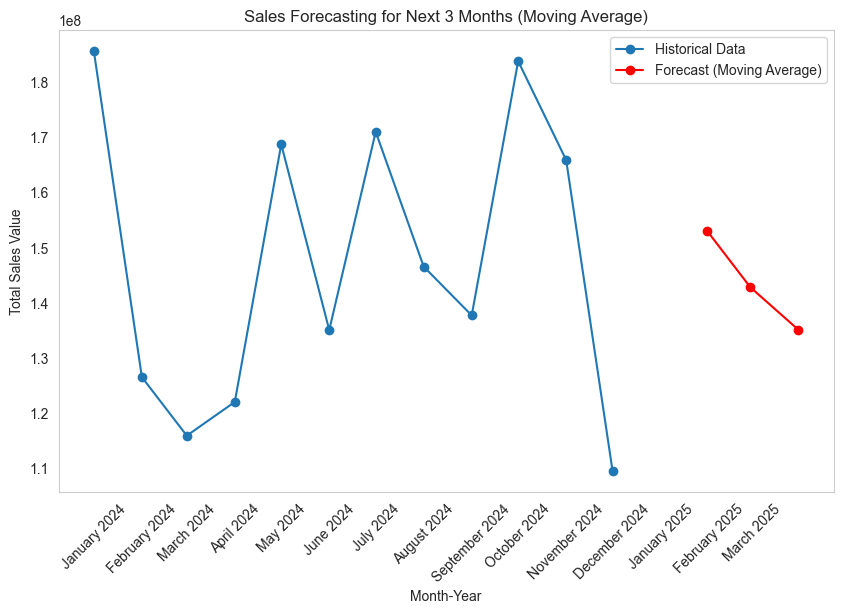

Forecasted Sales for the Next 3 Months (Moving Average):
2025-01-31: 153110289.67
2025-02-28: 142866869.22
2025-03-31: 135178124.30


In [139]:
# Step 2: Prepare the data
# We'll use the 'Total_Value' column for forecasting
ts = monthly_sales['Total_Value']

# Define the Moving Average window
window = 3  # Use the last 3 months to calculate the moving average

# Calculate the Moving Average
moving_avg = ts.rolling(window=window).mean()

# Forecast the next 3 months
forecast_steps = 3
forecast = []
for i in range(forecast_steps):
    # Use the last 'window' values to forecast the next value
    last_window = ts[-window:].values
    next_value = last_window.mean()
    forecast.append(next_value)
    # ts = ts.append(pd.Series(next_value, index=[ts.index[-1] + pd.DateOffset(months=1)]))
    # Append the forecasted value to the time series using pd.concat
    ts = pd.concat([ts, pd.Series(next_value, index=[ts.index[-1] + pd.DateOffset(months=1)])])

# Generate the forecast index (dates for the next 3 months)
forecast_index = pd.date_range(start=ts.index[-forecast_steps], periods=forecast_steps, freq='M')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(ts.index[:-forecast_steps], ts[:-forecast_steps], label='Historical Data', marker='o')
plt.plot(forecast_index, forecast, label='Forecast (Moving Average)', color='red', marker='o')
plt.title('Sales Forecasting for Next 3 Months (Moving Average)')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Value')
# Format x-axis to show Month-Year labels
plt.xticks(ts.index, [date.strftime('%B %Y') for date in ts.index], rotation=45)  # Rotate labels for better readability
plt.legend()
plt.grid()
plt.show()

# Print the forecasted values
print("Forecasted Sales for the Next 3 Months (Moving Average):")
for date, value in zip(forecast_index, forecast):
    print(f"{date.strftime('%Y-%m-%d')}: {value:.2f}")

#### Exponential Smoothing

In [140]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model with trend and seasonality
ets_model = ExponentialSmoothing(monthly_sales["Total_Value"], trend="add", seasonal="add", seasonal_periods=3) # Try quarterly seasons
ets_fit = ets_model.fit()

# Forecast next 3 months
forecast_ets = ets_fit.forecast(3)

# Display results
print(forecast_ets)


2025-01-01    1.801163e+08
2025-02-01    1.784281e+08
2025-03-01    1.612399e+08
Freq: MS, dtype: float64


/Users/allan_g/Desktop/projects/Data Analysis/Kwanza Tukule Project/kt_assmt/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/allan_g/Desktop/projects/Data Analysis/Kwanza Tukule Project/kt_assmt/lib/python3.13/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


/var/folders/zr/t17dd_4n2sgck29t3wnyv9f40000gn/T/ipykernel_32463/1429512229.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=ts.index[-1], periods=4, freq='M')[1:], forecast_ets, label='Forecast', color='red')


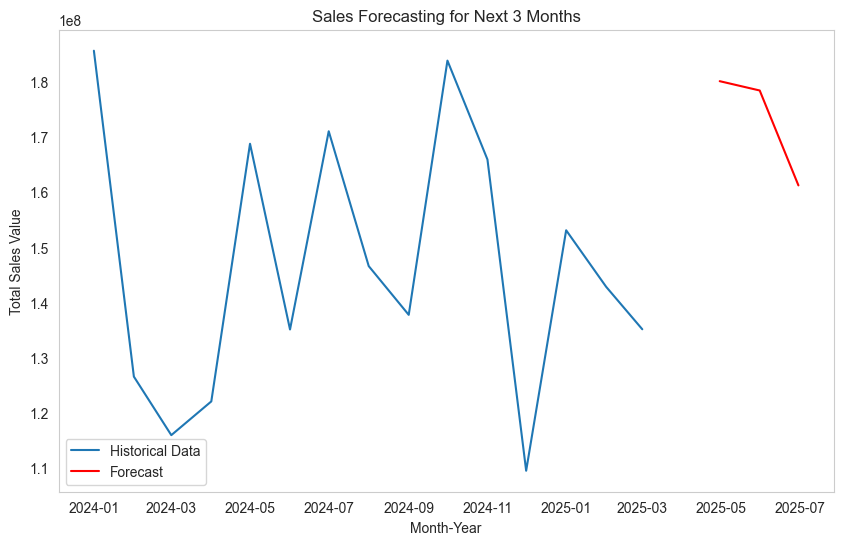

Forecasted Sales for the Next 3 Months:
2025-01-01    1.801163e+08
2025-02-01    1.784281e+08
2025-03-01    1.612399e+08
Freq: MS, dtype: float64


In [141]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(ts.index, ts, label='Historical Data')
plt.plot(pd.date_range(start=ts.index[-1], periods=4, freq='M')[1:], forecast_ets, label='Forecast', color='red')
plt.title('Sales Forecasting for Next 3 Months')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Value')
plt.legend()
plt.grid()
plt.show()

# Print the forecasted values
print("Forecasted Sales for the Next 3 Months:")
print(forecast_ets)

/Users/allan_g/Desktop/projects/Data Analysis/Kwanza Tukule Project/kt_assmt/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/allan_g/Desktop/projects/Data Analysis/Kwanza Tukule Project/kt_assmt/lib/python3.13/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/var/folders/zr/t17dd_4n2sgck29t3wnyv9f40000gn/T/ipykernel_32463/3838500783.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=ts.index[-1], periods=4, freq='M')[1:], forecast, label='Forecast', color='red')


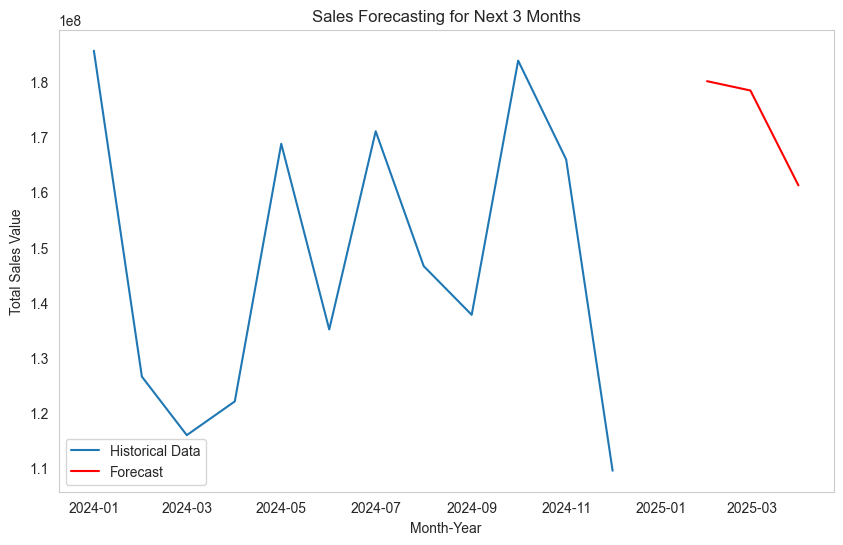

Forecasted Sales for the Next 3 Months:
2025-01-01    1.801163e+08
2025-02-01    1.784281e+08
2025-03-01    1.612399e+08
Freq: MS, dtype: float64


In [142]:
# Prepare the data
# We'll use the 'Total_Value' column for forecasting
ts = monthly_sales['Total_Value']

# Fit the Exponential Smoothing model
model = ExponentialSmoothing(ts, trend='add',seasonal='add', seasonal_periods=3)
fit_model = model.fit()

# Forecast the next 3 months
forecast = fit_model.forecast(steps=3)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(ts.index, ts, label='Historical Data')
plt.plot(pd.date_range(start=ts.index[-1], periods=4, freq='M')[1:], forecast, label='Forecast', color='red')
plt.title('Sales Forecasting for Next 3 Months')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Value')
plt.legend()
plt.grid()
plt.show()

# Print the forecasted values
print("Forecasted Sales for the Next 3 Months:")
print(forecast)


#### ARIMA Model

- SARIMA modelused soas. to consider seasonality

In [143]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


/Users/allan_g/Desktop/projects/Data Analysis/Kwanza Tukule Project/kt_assmt/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/allan_g/Desktop/projects/Data Analysis/Kwanza Tukule Project/kt_assmt/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/allan_g/Desktop/projects/Data Analysis/Kwanza Tukule Project/kt_assmt/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/var/folders/zr/t17dd_4n2sgck29t3wnyv9f40000gn/T/ipykernel_32463/2926068781.py:18: FutureWarning: 'M' is 

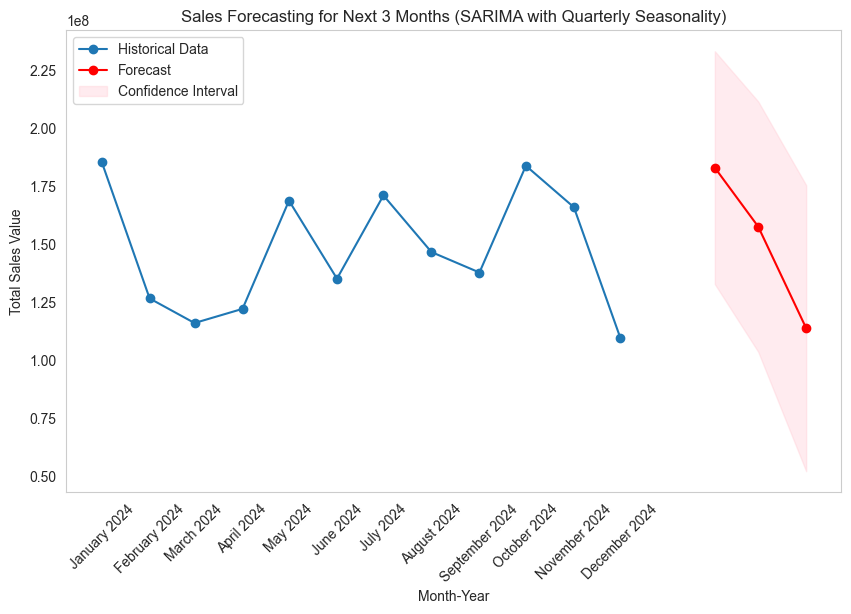

Forecasted Sales for the Next 3 Months (SARIMA):
2025-01-01    1.830155e+08
2025-02-01    1.576116e+08
2025-03-01    1.137644e+08
Freq: MS, Name: predicted_mean, dtype: float64


In [144]:
#  Define the SARIMA model
# Non-seasonal order: (p, d, q)
# Seasonal order: (P, D, Q, s) where s=3 for quarterly seasonality
order = (1, 1, 1)  # Non-seasonal order (p, d, q)
seasonal_order = (1, 1, 1, 3)  # Seasonal order (P, D, Q, s)

# Fit the SARIMA model
model = SARIMAX(ts, order=order, seasonal_order=seasonal_order)
fit_model = model.fit(disp=False)

# Forecast the next 3 months
forecast_steps = 3
forecast = fit_model.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Generate the forecast index (dates for the next 3 months)
forecast_index = pd.date_range(start=ts.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(ts.index, ts, label='Historical Data', marker='o')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red', marker='o')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('Sales Forecasting for Next 3 Months (SARIMA with Quarterly Seasonality)')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Value')
# Format x-axis to show Month-Year labels
plt.xticks(ts.index, [date.strftime('%B %Y') for date in ts.index], rotation=45)  # Rotate labels for better readability
plt.legend()
plt.grid()
plt.show()

# Print the forecasted values
print("Forecasted Sales for the Next 3 Months (SARIMA):")
print(forecast_values)


#### Anomaly Detection

In [145]:
from scipy.stats import zscore


In [146]:
# Compute Z-scores for Total_Quantity and Total_Value
monthly_sales["Z_Score_Quantity"] = zscore(monthly_sales["Total_Quantity"])
monthly_sales["Z_Score_Value"] = zscore(monthly_sales["Total_Value"])


In [147]:
# Flag anomalies where Z-score > 2 or < -2
anomalies = monthly_sales[
    (monthly_sales["Z_Score_Quantity"].abs() > 2) | 
    (monthly_sales["Z_Score_Value"].abs() > 2)
]


In [148]:
# Display anomalies
print(anomalies[["Total_Quantity", "Total_Value"]])


Empty DataFrame
Columns: [Total_Quantity, Total_Value]
Index: []


In [149]:
# # Calculate IQR for Quantity and Value
# Q1 = monthly_sales.quantile(0.25)
# Q3 = monthly_sales.quantile(0.75)
# IQR = Q3 - Q1
Q1 = monthly_sales[["Total_Quantity", "Total_Value"]].quantile(0.25)
Q3 = monthly_sales[["Total_Quantity", "Total_Value"]].quantile(0.75)
IQR = Q3 - Q1



In [150]:
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)


In [151]:
anomalies_iqr = monthly_sales[
    (monthly_sales["Total_Quantity"] < lower_bound["Total_Quantity"]) |
    (monthly_sales["Total_Quantity"] > upper_bound["Total_Quantity"]) |
    (monthly_sales["Total_Value"] < lower_bound["Total_Value"]) |
    (monthly_sales["Total_Value"] > upper_bound["Total_Value"])
]

print(anomalies_iqr[["Total_Quantity", "Total_Value"]])


Empty DataFrame
Columns: [Total_Quantity, Total_Value]
Index: []


NB: Try. using the quantity to value ratio to see if any anomalies occur. Might explain the strange pattern in March and Deceember.

### Customer Retention

In [152]:
customer_ret_data = recency_df.merge(frequency_df, on='ANONYMIZED BUSINESS', how='left')
customer_ret_data = customer_ret_data.merge(total_quantity_per_business, on='ANONYMIZED BUSINESS', how='left')
customer_ret_data = customer_ret_data.merge(total_value_per_business, on='ANONYMIZED BUSINESS', how='left')


In [153]:
customer_ret_data

,ANONYMIZED BUSINESS,LAST_SALE_DATE,recency,frequency,total_quantity_purchased,TOTAL_VALUE
0,Business-0000,2024-12-26 19:28:00,5,8,8,10445.0
1,Business-0005,2024-05-31 10:49:00,215,1,1,2645.0
2,Business-0029,2024-05-14 20:19:00,231,6,26,77340.0
3,Business-003d,2024-12-08 18:52:00,23,31,98,221761.0
4,Business-0072,2024-12-15 18:40:00,16,101,127,225056.0
...,...,...,...,...,...,...
4794,Business-ffa9,2024-04-10 21:00:00,265,3,3,6740.0
4795,Business-ffae,2024-06-13 13:47:00,202,5,6,10530.0
4796,Business-ffb1,2024-10-25 21:51:00,67,105,266,438115.0
4797,Business-ffd2,2024-09-26 20:36:00,96,22,37,67723.0


In [154]:
customer_ret_data.describe()

,LAST_SALE_DATE,recency,frequency,total_quantity_purchased,TOTAL_VALUE
count,4799,4799.000000,4799.000000,4799.000000,4.799000e+03
mean,2024-09-22 12:22:29.918733056,100.756199,68.727443,159.569285,3.686293e+05
min,2024-01-01 07:18:00,1.000000,1.000000,1.000000,2.000000e+00
25%,2024-07-16 20:08:00,14.000000,3.000000,5.000000,9.220000e+03
50%,2024-10-09 14:28:00,84.000000,11.000000,20.000000,4.190000e+04
75%,2024-12-17 20:58:30,168.000000,61.000000,114.000000,2.342840e+05
max,2024-12-31 18:24:00,366.000000,2611.000000,13991.000000,2.803736e+07
std,NaN,91.498177,149.033747,479.914320,1.175060e+06


In [155]:
customer_ret_data

,ANONYMIZED BUSINESS,LAST_SALE_DATE,recency,frequency,total_quantity_purchased,TOTAL_VALUE
0,Business-0000,2024-12-26 19:28:00,5,8,8,10445.0
1,Business-0005,2024-05-31 10:49:00,215,1,1,2645.0
2,Business-0029,2024-05-14 20:19:00,231,6,26,77340.0
3,Business-003d,2024-12-08 18:52:00,23,31,98,221761.0
4,Business-0072,2024-12-15 18:40:00,16,101,127,225056.0
...,...,...,...,...,...,...
4794,Business-ffa9,2024-04-10 21:00:00,265,3,3,6740.0
4795,Business-ffae,2024-06-13 13:47:00,202,5,6,10530.0
4796,Business-ffb1,2024-10-25 21:51:00,67,105,266,438115.0
4797,Business-ffd2,2024-09-26 20:36:00,96,22,37,67723.0


In [156]:
quarterly_sales = sales_df_cleaned
quarterly_sales

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,MONTH-YEAR,VALUE
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,August 2024,850.0
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0,August 2024,3820.0
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0,August 2024,3670.0
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0,August 2024,2605.0
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0,August 2024,7400.0
...,...,...,...,...,...,...,...,...,...
333398,2024-11-13 13:59:00,Category-121,Product-898d,Business-0e99,Location-689f,5,1360.0,November 2024,6800.0
333401,2024-08-20 20:24:00,Category-106,Product-21f4,Business-72bc,Location-689f,1,850.0,August 2024,850.0
333402,2024-08-20 20:24:00,Category-76,Product-6e9c,Business-72bc,Location-689f,1,2575.0,August 2024,2575.0
333403,2024-10-10 18:19:00,Category-91,Product-523e,Business-2693,Location-b27b,1,1520.0,October 2024,1520.0


In [157]:

# Extract quarter and year from the DATE column
quarterly_sales['Quarter'] = quarterly_sales['DATE'].dt.to_period('Q')

# Now, we group by 'ANONYMIZED BUSINESS' and 'Quarter' to count the number of transactions per quarter
quarterly_transactions = quarterly_sales.groupby(['ANONYMIZED BUSINESS', 'Quarter']).size().reset_index(name='transaction_count')


In [158]:
# Sort the data by business and quarter to ensure proper calculation
quarterly_transactions.sort_values(by=['ANONYMIZED BUSINESS', 'Quarter'], inplace=True)

# Now calculate the percentage change in transaction frequency between consecutive quarters
quarterly_transactions['frequency_change'] = quarterly_transactions.groupby('ANONYMIZED BUSINESS')['transaction_count'].pct_change() * 100


In [161]:
# Now calculate the difference in transaction count between consecutive quarters
quarterly_transactions['transaction_diff'] = quarterly_transactions.groupby('ANONYMIZED BUSINESS')['transaction_count'].diff()

In [162]:
quarterly_transactions

,ANONYMIZED BUSINESS,Quarter,transaction_count,frequency_change,transaction_diff
0,Business-0000,2024Q2,2,NaN,NaN
1,Business-0000,2024Q3,1,-50.000000,-1.0
2,Business-0000,2024Q4,5,400.000000,4.0
3,Business-0005,2024Q2,1,NaN,NaN
4,Business-0029,2024Q2,6,NaN,NaN
...,...,...,...,...,...
10086,Business-ffd2,2024Q1,2,NaN,NaN
10087,Business-ffd2,2024Q2,8,300.000000,6.0
10088,Business-ffd2,2024Q3,12,50.000000,4.0
10089,Business-ffff,2024Q3,18,NaN,NaN


In [163]:
quarterly_transactions.describe()

,transaction_count,frequency_change,transaction_diff
count,10091.000000,5292.000000,5292.000000
mean,32.684868,115.738865,3.820862
std,53.793847,559.386918,37.796459
min,1.000000,-99.224806,-270.000000
25%,3.000000,-40.990514,-9.000000
50%,11.000000,0.592048,1.000000
75%,40.000000,100.000000,14.000000
max,1299.000000,17100.000000,653.000000


In [164]:
# Find businesses with a transaction count difference of more than 20 between consecutive quarters
significant_diff = quarterly_transactions[quarterly_transactions['transaction_diff'].abs() > 150]

# Display businesses that had a significant difference in transaction count
print(significant_diff[['ANONYMIZED BUSINESS', 'Quarter', 'transaction_count', 'transaction_diff']])


     ANONYMIZED BUSINESS Quarter  transaction_count  transaction_diff
499        Business-0d61  2024Q4                148            -161.0
807        Business-155f  2024Q2                244             170.0
1178       Business-1ddc  2024Q3                369             169.0
1222       Business-1edd  2024Q4                172             171.0
1355       Business-2213  2024Q4                184             167.0
1454       Business-245e  2024Q2                 75            -203.0
1482       Business-24c3  2024Q4                440             403.0
1552       Business-263c  2024Q3                  3            -181.0
2001       Business-30b8  2024Q4                285             183.0
2334       Business-3955  2024Q2                  4            -222.0
2346       Business-3996  2024Q4                249             208.0
2897       Business-468e  2024Q2                292             179.0
3033       Business-49e7  2024Q4                286             178.0
3431       Business-

/var/folders/zr/t17dd_4n2sgck29t3wnyv9f40000gn/T/ipykernel_32463/1414002895.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ANONYMIZED BUSINESS', y='transaction_diff', data=significant_diff, palette='coolwarm')


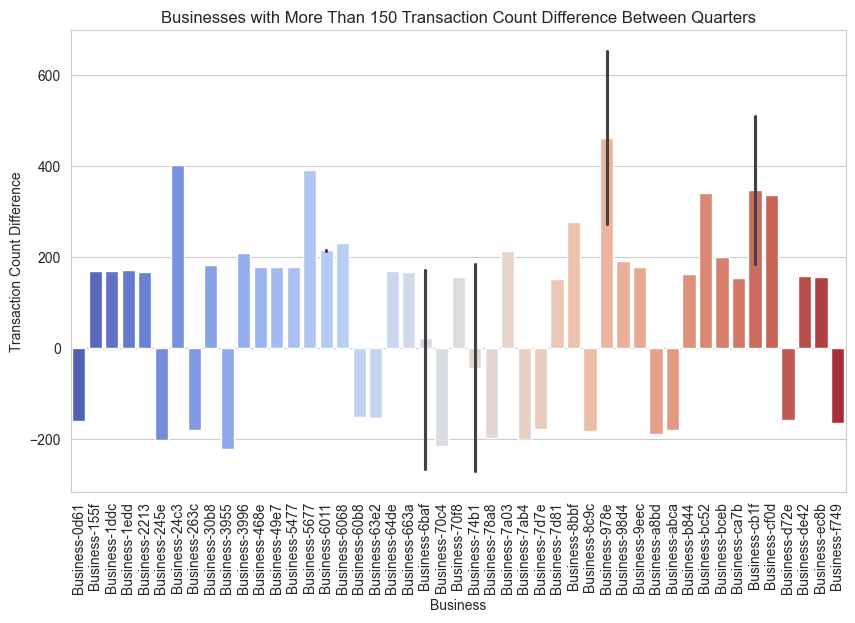

In [165]:
# Plot the transaction count difference for businesses with significant changes
plt.figure(figsize=(10, 6))
sns.barplot(x='ANONYMIZED BUSINESS', y='transaction_diff', data=significant_diff, palette='coolwarm')

# Add labels and title
plt.xlabel('Business')
plt.ylabel('Transaction Count Difference')
plt.title('Businesses with More Than 150 Transaction Count Difference Between Quarters')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.show()


In [166]:
# Step 2: Sort by the absolute value of the transaction difference to get the most significant changes
top_significant_diff = significant_diff.reindex(significant_diff['transaction_diff'].abs().sort_values(ascending=False).index)
top_significant_diff


,ANONYMIZED BUSINESS,Quarter,transaction_count,frequency_change,transaction_diff
6153,Business-978e,2024Q4,1299,101.083591,653.0
8141,Business-cb1f,2024Q4,766,199.218750,510.0
1482,Business-24c3,2024Q4,440,1089.189189,403.0
3524,Business-5677,2024Q4,498,365.420561,391.0
7537,Business-bc52,2024Q4,375,1002.941176,341.0
8269,Business-cf0d,2024Q4,373,936.111111,337.0
5749,Business-8bbf,2024Q3,361,324.705882,276.0
6152,Business-978e,2024Q3,646,72.727273,272.0
4772,Business-74b1,2024Q3,7,-97.472924,-270.0
4425,Business-6baf,2024Q4,68,-79.640719,-266.0


In [167]:
# Step 3: Select the top 15 results
top_20_significant_diff = top_significant_diff.head(20)

# Display the top 15 most significant results
print(top_20_significant_diff[['ANONYMIZED BUSINESS', 'Quarter', 'transaction_count', 'transaction_diff']])

     ANONYMIZED BUSINESS Quarter  transaction_count  transaction_diff
6153       Business-978e  2024Q4               1299             653.0
8141       Business-cb1f  2024Q4                766             510.0
1482       Business-24c3  2024Q4                440             403.0
3524       Business-5677  2024Q4                498             391.0
7537       Business-bc52  2024Q4                375             341.0
8269       Business-cf0d  2024Q4                373             337.0
5749       Business-8bbf  2024Q3                361             276.0
6152       Business-978e  2024Q3                646             272.0
4772       Business-74b1  2024Q3                  7            -270.0
4425       Business-6baf  2024Q4                 68            -266.0
3940       Business-6068  2024Q3                555             230.0
2334       Business-3955  2024Q2                  4            -222.0
3925       Business-6011  2024Q4                360             216.0
4623       Business-

/var/folders/zr/t17dd_4n2sgck29t3wnyv9f40000gn/T/ipykernel_32463/625752359.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ANONYMIZED BUSINESS', y='transaction_diff', data=top_20_significant_diff, palette='coolwarm')


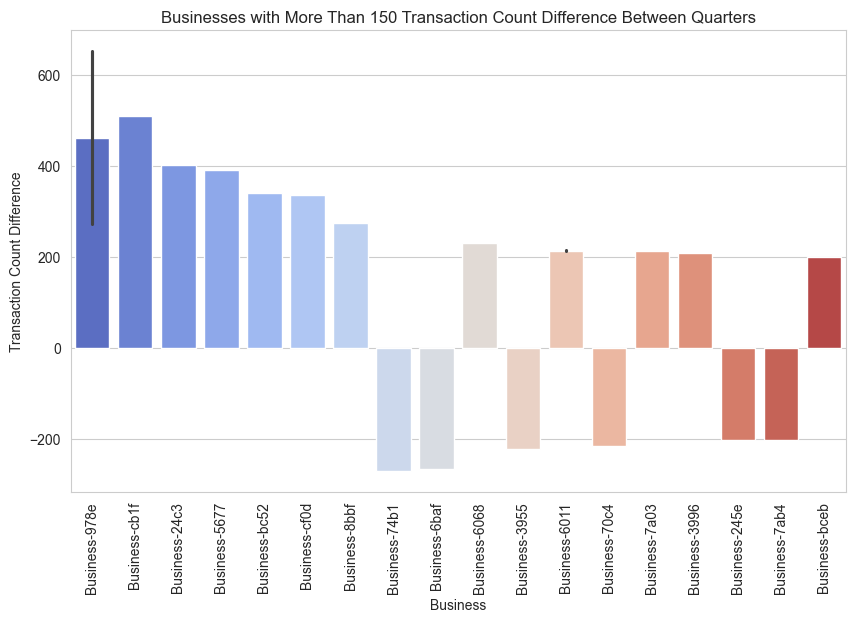

In [168]:
# Plot the transaction count difference for businesses with significant changes
plt.figure(figsize=(10, 6))
sns.barplot(x='ANONYMIZED BUSINESS', y='transaction_diff', data=top_20_significant_diff, palette='coolwarm')

# Add labels and title
plt.xlabel('Business')
plt.ylabel('Transaction Count Difference')
plt.title('Businesses with More Than 150 Transaction Count Difference Between Quarters')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.show()


/var/folders/zr/t17dd_4n2sgck29t3wnyv9f40000gn/T/ipykernel_32463/1230645324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_significant_diff['Business_Code'] = top_20_significant_diff['ANONYMIZED BUSINESS'].str.replace('Business-', '', regex=False)
/var/folders/zr/t17dd_4n2sgck29t3wnyv9f40000gn/T/ipykernel_32463/1230645324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_significant_diff['Label'] = top_20_significant_diff['Business_Code'] + ' - ' + top_20_significant_diff['Quarter'].ast

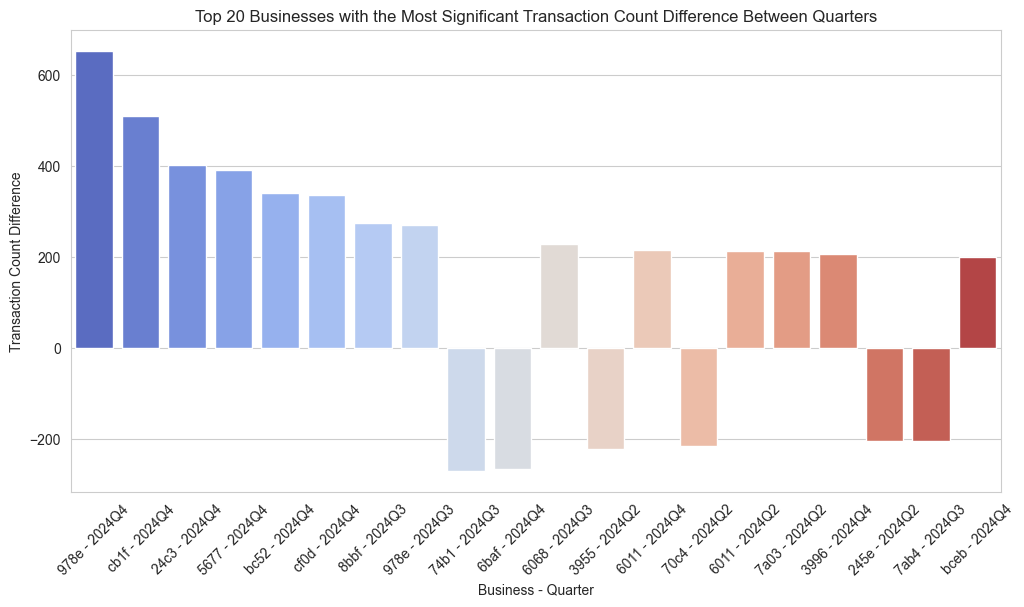

In [169]:
# Step 1: Extract the business code (remove 'Business-' prefix) and concatenate with the quarter
top_20_significant_diff['Business_Code'] = top_20_significant_diff['ANONYMIZED BUSINESS'].str.replace('Business-', '', regex=False)
top_20_significant_diff['Label'] = top_20_significant_diff['Business_Code'] + ' - ' + top_20_significant_diff['Quarter'].astype(str)

# Step 2: Plot the transaction count difference
plt.figure(figsize=(12, 6))
sns.barplot(x='Label', y='transaction_diff', data=top_20_significant_diff, palette='coolwarm')

# Add labels and title
plt.xlabel('Business - Quarter')
plt.ylabel('Transaction Count Difference')
plt.title('Top 20 Businesses with the Most Significant Transaction Count Difference Between Quarters')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.show()


In [170]:
import plotly.express as px


In [172]:
import plotly.io as pio
pio.renderers.default = "browser"  # Forces it to open in a web browser


In [173]:
# Step 2: Create the interactive bar plot
fig = px.bar(top_20_significant_diff, 
             x='Label', 
             y='transaction_diff', 
             color='transaction_diff', 
             title='Top 20 Businesses with the Most Significant Transaction Count Difference Between Quarters',
             labels={'Label': 'Business - Quarter', 'transaction_diff': 'Transaction Count Difference'},
             color_continuous_scale='RdBu')  # Use a valid colorscale

# Step 3: Update the layout for better readability
fig.update_xaxes(tickangle=45)  # Rotate x-axis labels for readability
fig.update_layout(showlegend=False)  # Remove the legend (optional)

# Show the plot
fig.show()